   ## Advanced Regression 
> ### ***Submission by - Srinivasan Gopalakrishnan***
> ### ***Submitted on  - 1, April, 2019***
> ### ***Student Batch - PGDDS September 2018***

### Problem Statement
> A US based housing company Suprise Housing purchase houses at prices below their actual value and sell them at higher price. So, company wants to buy prospective properties , so that they want to predict actual values of various types of properties, as per the current market and find out it is suitable to invest in them or not.

> The main aim is;
  - Which are the predictor variables significant in predicting the price of the house
  - How well those variables help describing the price of the house.
  - determine the optimal value for lambda for ridge and lasso regression.

### Business Goal
>- Build a regression Model with target variable (SalePrice) with other independent variables (predictor variables).
>- To understand how exactly prices vary with predictor variables.
>- So that, they can manuipulate the  business strategy & design based on the impact of prices due to variation in predictor variables.
>- Also, model should help to understand the pricing dynamics of the new market.

## Step 1: Import Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Scikit Libraries.
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.metrics import mean_squared_error

#Cross validations libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

#Regularisation Scores.
from RegscorePy import *

In [3]:
# Set up jupyter notebook options to work.
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Setup few jupyter notebook display options.
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",400)

## Step 2: Reading and Understanding the Data

In [4]:
# Read the data and keep base data frame as cars.
housing_data = pd.read_csv("./train.csv")

In [5]:
housing_data.shape

(1460, 81)

## New heading

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###  2.1: Analyse the Numerical and categorical variables

In [8]:
housing_data_numerical = housing_data.select_dtypes(include=['int64','float64'])
housing_data_numerical.columns
print(len(housing_data_numerical.columns))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

38


In [9]:
housing_data_objects = housing_data.select_dtypes(include='object')
housing_data_objects.columns
print(len(housing_data_objects.columns))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

43


#### **Observations**<br>
> - There are `1460 rows` and `81 columns` in the original housing_data dataframe .<br>
> - There are `38 Numerical Variables` and `43 string Variables`.<br>
> - In the original data set fllowing are the categorical variables ;<br>
  - `MSZoning`,  `Street`, `Alley`, `LotShape`, `LandContour`, `Utilities`, `LotConfi`,
  - `LandSlope`, `Neighborhood`, `Condition1`, `Condition2`, `BldgType`, `HouseStyle`,
  - `RoofStyle`, `RoofMatl`, `Exterior1st`, `Exterior2nd`, `MasVnrType`, `ExterQual`,
  - `ExterCond`,  `Foundation`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`,
  - `BsmtFinType2`, `Heating`, `HeatingQC`, `CentralAir`, `Electrical`, `KitchenQua`,
  - `Functional`, `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`,
  - `PavedDrive`, `PoolQC`, `Fence`, `MiscFeature`, `SaleType`, `SaleCondition`.
  
> - Following 20 are the Numerical Variables;
  - `Id`, `LotFrontage`, `LotArea`, `MasVnrArea`, `BsmtFinSF1`,
  - `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `1stFlrSF`,`2ndFlrSF`, `LowQualFinSF`,
  - `GrLivArea`, `GarageArea`, `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorc`, `3SsnPorch`,
  - `ScreenPorch`, `PoolArea`, `MiscVal` 
  
> - Following 12 are Numerical variables which can be classified as categorical variables.
  - `MSSubClass`, `OverallQual`, `OverallCond`, `BsmtFullBath`, `BsmtHalfBath`,
  - `FullBath`,`HalfBath`, `BedroomAbvGr`, `KitchenAbvGr`, `TotRmsAbvGrd`, 
  - `Fireplaces`, `GarageCars`.
   
> - Following 5 datetime or date variables 
  - `YearBuilt`, `YearRemodAdd`, `GarageYrBlt`,`MoSold`, `YrSold` 
  
> The target 1 dependent or response variable is `SalePrice`.


#### **Inferences** <br>

> Need further analysis on ;
> - The 12 numerical variables which can be converted to categorical variables.
> - The `Id` variables which is NOT required for analysis and can be dropped.
> - The 5 datetime or date time to be classified as categorical 
> - Need to check for null values in the data.

## Step 3: Data Cleaning and Preparation

###  3.1 : Drop insignificant or not useful columns

In [10]:
# Drop the 'Id' column which is not required for analysis.
housing = housing_data.drop('Id',axis=1)
housing.shape

(1460, 80)

### 3.2 : Cleaning Categorical Column Values.

In [14]:
housing['MSZoning'].value_counts()
housing['MSZoning'] = housing['MSZoning'].str.replace(r"\(.*\)","")
housing['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

RL    1151
RM     218
FV      65
RH      16
C       10
Name: MSZoning, dtype: int64

### 3.2 : Check any duplicate rows 

In [15]:
housing.duplicated().sum()

0

#### **Observations**<br>
> - There are no duplicate rows exists in the data set.
> - Non Significant columns are dropped

### 3.3: Verify the rows where all columns have null values  

In [16]:
housing.isnull().all(axis=0).sum()

0

###  3.4: Verify percentage Null values in columns

In [17]:
NaN_cols =housing.columns[housing.isnull().any()]
NaN_cols

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [18]:
# find out the percentage of nulls in data frame.
round(100*(housing.isnull().sum()/len(housing.index)), 2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

#### **Observations**<br>
> - Below columns  have high percentage of null values.  
  - PoolQC      - `99.52%` , MiscFeature - `96.30%`  , Fence       - `80.75%`<br>
  - FireplaceQu - `47.26%` , Alley       - `93.77%`  , LotFrontage - `17.74%`<br>      
  - GarageType  - `5.55%`  ,  GarageYrBlt - `5.55%`  , GarageFinish- `5.55%`<br>
  - GarageQual  - `5.55%`  ,  MasVnrArea  - `0.55%`  , GarageCond  - `5.55%`<br>
  - BsmtQual    - `2.53%`  ,  BsmtCond    - `2.53%`  , BsmtExposure- `2.60%`<br>
  - BsmtFinType1- `2.53%`  ,  BsmtFinType2- `2.60%`  , MasVnrType  - `0.55%`<br>
  - MasVnrArea  - `0.55%`  ,  Electrical  - `0.07%`<br>
  
#### **Inferences** <br>
> - The 99% rows have 0 or Null values for `PoolArea` (No pool area exists) and `PoolQC` (unknown pool quality) columns. Hence these two columns are not very useful for our analysis and can be dropped from the datast for analysis.<br>
> - Similarly, the columns `MiscFeature` (Nll Miscellaoues Features)  and/or corresponding `MiscVal` (Null miscaellaneous values) columns have huge percentage of null values (~96%).  Hence these columns too can be dropped from the analysis.<br>
> - The columns `Alley` and  `fences`  have 94% and 81% null as values . So the columns considered not useful for analysis and can be dropped.<br>  
> - The `FireplaceQu` has corresponding Fireplaces column has 0 (null fireplaces) and can be imputed with `No Fireplace` or `NF`.<br>
> - Around 17% have rows has null for columns `LotFrontage`. Here, though we have corresponding `LotArea` we assume there is no streets connected to the propery where `LotFrontage` is null. The value can be replaced to 0 instead of null values.<br>
> - The remaining categorical null values columns can be imputed with appropriate values. 

###  3.5: Drop columns having Non-Significant columns (High percentage Nulls)

In [19]:
drop_columns = ['PoolQC', 'PoolArea', 'MiscFeature','MiscVal', 'Alley', 'Fence' ] 

# Drop the insignificant or high null value columnswhich are not required for analysis.
housing = housing.drop(columns=drop_columns,axis=1)
housing.shape

(1460, 74)

###  3.6: Drop column (Numerical) having High Percentage of 0  (insignificant column)

In [20]:
housing = housing.drop(columns=['LowQualFinSF'],axis=1)
housing.shape

(1460, 73)

### 3.7: Impute Null values for other categorical columns

In [21]:
# Impute NaN values for categorical 'MasVnrType' to 'None'  
housing.loc[housing['MasVnrType'].isnull(),'MasVnrType'] = 'None'

# Impute FireplaceQu to 'No Fireplace' or 'NF'
housing.loc[housing['FireplaceQu'].isnull(),'FireplaceQu'] = 'NF'

# Impute BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,'BsmtFinType2' 
# to 'No Basement' or 'NB'
housing.loc[housing['BsmtQual'].isnull(),'BsmtQual'] = 'NB'
housing.loc[housing['BsmtCond'].isnull(),'BsmtCond'] = 'NB'
housing.loc[housing['BsmtExposure'].isnull(),'BsmtExposure'] = 'NB'
housing.loc[housing['BsmtFinType1'].isnull(),'BsmtFinType1'] = 'NB'
housing.loc[housing['BsmtFinType2'].isnull(),'BsmtFinType2'] = 'NB'

In [22]:
# Since the percentage of rows are neglibile for all the categorical columns
# GarageType,GarageYrBlt,  GarageFinish, GarageQual, GarageCond 
# The value can be imputed with 'Unknown' values.

housing.loc[housing['GarageType'].isnull(),'GarageType'] = 'Unknown'
#housing.loc[housing['GarageYrBlt'].isnull(),'GarageYrBlt'] = 'Unknown'
housing.loc[housing['GarageFinish'].isnull(),'GarageFinish'] = 'Unknown'
housing.loc[housing['GarageQual'].isnull(),'GarageQual'] = 'Unknown'
housing.loc[housing['GarageCond'].isnull(),'GarageCond'] = 'Unknown'

# Impute the column `Electrical` having nulls with `Unknown'
housing.loc[housing['Electrical'].isnull(),'Electrical'] = 'Unknown'

### 3.8: Impute Null values for Numerical Values 

In [23]:
# Impute LotFrontage with its mean value for the corresponding Nan
mean_frontage = round(housing['LotFrontage'].mean(),0)
housing.loc[housing['LotFrontage'].isnull(),'LotFrontage'] = mean_frontage

# Impute 'MasVnrArea  to '0' for the rows which are having nulls (having MasVnrType is 'None'.
housing.loc[housing['MasVnrArea'].isnull(),'MasVnrArea'] = 0

### 3.9: Convert YearBuilt Column to Categorical Years (Binned Years)

In [24]:
#New, Mid-aged, Old, Very.Old and None
lower,higher = housing['YearBuilt'].min(), housing['YearBuilt'].max()
print("Min-",lower , "Max-",higher)

# Create Bins for YearBuilt column - YearBuilt_bin
bins = [1871,1925,1958,1988,2010]
label_names = ['Very_Old','Old','Middle_Aged','New']
housing['YearBuilt_bin'] = pd.cut(housing['YearBuilt'], bins, labels=label_names)
housing['YearBuilt_bin'].value_counts()

Min- 1872 Max- 2010


New            554
Middle_Aged    447
Old            297
Very_Old       162
Name: YearBuilt_bin, dtype: int64

### 3.10: Convert GarageYrblt (Garage Year Built) Columns to Categorical Years (Binned Years)

In [22]:
# Replace Null values to 0
housing['GarageYrBlt'].fillna(0,inplace=True)
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype('int64')
housing.loc[housing['GarageYrBlt'] == 0,'GarageYrBlt'].count()

# Verify min and max values of the column
lower,higher = housing['GarageYrBlt'].min(), housing['GarageYrBlt'].max()
print("Min-",lower , "Max-",higher)

81

Min- 0 Max- 2010


In [25]:
# Binning the Garage Year Built to Very Old, Old, Middle Aged and New categorical Values.

bins = [1899,1937,1964,1989,2010]
label_names = ['Very_Old','Old','Middle_Aged','New']
housing['GarageYrBlt_bin'] = pd.cut(housing['GarageYrBlt'], bins, labels=label_names)
housing['GarageYrBlt_bin'] = np.where(housing['GarageYrBlt_bin'].isnull(),'Unknown',housing['GarageYrBlt_bin'])
housing['GarageYrBlt_bin'].isnull().sum()
housing['GarageYrBlt_bin'].value_counts()

0

New            598
Middle_Aged    379
Old            305
Very_Old        97
Unknown         81
Name: GarageYrBlt_bin, dtype: int64

### 3.11: Convert YrSold (Year Sold) Columns to Categorical Years (Binned Years)

In [26]:
housing['YrSold'].value_counts()
housing['YrSold'].isnull().sum()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

0

In [27]:
# Create bins for Year Sold variable as categorical bin.

bins = [2005,2006,2007,2008,2009,2010]
label_names = ['<=2006','2006_2007','2007_2008','2008_2009','2009+']
housing['YrSold_bin'] = pd.cut(housing['YrSold'], bins, labels=label_names)
housing['YrSold_bin'].value_counts()

2008_2009    338
2006_2007    329
<=2006       314
2007_2008    304
2009+        175
Name: YrSold_bin, dtype: int64

### 3.12: Convert YearRemodAdd (Remodel date) Columns to Categorical Years (Binned Years)

In [28]:
#housing['YearRemodAdd'].value_counts()
housing['YearRemodAdd'].isnull().sum()
# Verify min and max values of the column
lower,higher = housing['YearRemodAdd'].min(), housing['YearRemodAdd'].max()
print("Min-",lower , "Max-",higher)

0

Min- 1950 Max- 2010


In [29]:
# Binning the YearRemodAdd to Very Old, Old, Middle Aged and New categorical Values.

bins = [1949,1964,1979,1994,2010]
label_names = ['Very_Old','Old','Middle_Aged','New']
housing['YearRemodAdd_bin'] = pd.cut(housing['YearRemodAdd'], bins, labels=label_names)
housing['YearRemodAdd_bin'].isnull().sum()
housing['YearRemodAdd_bin'].value_counts()

0

New            710
Very_Old       330
Old            250
Middle_Aged    170
Name: YearRemodAdd_bin, dtype: int64

### 3.13: Drop the original Year type columns

In [30]:
date_cols = ['YearBuilt','GarageYrBlt','YrSold','YearRemodAdd']
housing.drop(date_cols,axis=1,inplace=True)

In [31]:
# view the percentage of nulls in data frame.
round(100*(housing.isnull().sum()/len(housing.index)), 2)

MSSubClass          0.0
MSZoning            0.0
LotFrontage         0.0
LotArea             0.0
Street              0.0
LotShape            0.0
LandContour         0.0
Utilities           0.0
LotConfig           0.0
LandSlope           0.0
Neighborhood        0.0
Condition1          0.0
Condition2          0.0
BldgType            0.0
HouseStyle          0.0
OverallQual         0.0
OverallCond         0.0
RoofStyle           0.0
RoofMatl            0.0
Exterior1st         0.0
Exterior2nd         0.0
MasVnrType          0.0
MasVnrArea          0.0
ExterQual           0.0
ExterCond           0.0
Foundation          0.0
BsmtQual            0.0
BsmtCond            0.0
BsmtExposure        0.0
BsmtFinType1        0.0
BsmtFinSF1          0.0
BsmtFinType2        0.0
BsmtFinSF2          0.0
BsmtUnfSF           0.0
TotalBsmtSF         0.0
Heating             0.0
HeatingQC           0.0
CentralAir          0.0
Electrical          0.0
1stFlrSF            0.0
2ndFlrSF            0.0
GrLivArea       

In [32]:
housing.shape

(1460, 73)

#### **Observations**<br>
> - The number of rows `1460` and column variables `74` are after clean up.
> - The significant null value columns are dropped as they are irrelevent for the analysis or imputed with values if categorical.
> - The year columns having null values are imputed with mean year

#### **Observations**<br>
> - Further need an Univariate analysis to check distribution and locating any outliers in the data.

### 3.14: Convert variables to appropriate data types.

In [33]:
# Convert target/response field to float type
housing['SalePrice'] = housing_data['SalePrice'].astype('float64')

In [34]:
# convert LotFrontage, MasVnrArea from float type (square feet unit fields) to int64
housing['LotFrontage'] = housing['LotFrontage'].astype('int64')
housing['MasVnrArea'] = housing['MasVnrArea'].astype('int64')    

In [35]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
MSSubClass          1460 non-null int64
MSZoning            1460 non-null object
LotFrontage         1460 non-null int64
LotArea             1460 non-null int64
Street              1460 non-null object
LotShape            1460 non-null object
LandContour         1460 non-null object
Utilities           1460 non-null object
LotConfig           1460 non-null object
LandSlope           1460 non-null object
Neighborhood        1460 non-null object
Condition1          1460 non-null object
Condition2          1460 non-null object
BldgType            1460 non-null object
HouseStyle          1460 non-null object
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
RoofStyle           1460 non-null object
RoofMatl            1460 non-null object
Exterior1st         1460 non-null object
Exterior2nd         1460 non-null object
MasVnrType          1460 non-null obj

### 315: Convert Categorical Numerical (int) variables to categorical variables

In [36]:
# Convert Numerical variables to Category type variables.

housing['MSSubClass'] = housing['MSSubClass'].astype('category')
housing['OverallQual'] = housing['OverallQual'].astype('category')
housing['OverallCond'] = housing['OverallCond'].astype('category')
housing['BsmtFullBath'] = housing['BsmtFullBath'].astype('category')
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].astype('category')
housing['FullBath'] = housing['FullBath'].astype('category')
housing['HalfBath'] = housing['HalfBath'].astype('category')
housing['BedroomAbvGr'] = housing['BedroomAbvGr'].astype('category')
housing['KitchenAbvGr'] = housing['KitchenAbvGr'].astype('category')
housing['TotRmsAbvGrd'] = housing['TotRmsAbvGrd'].astype('category')
housing['Fireplaces'] = housing['Fireplaces'].astype('category')
housing['GarageCars'] = housing['GarageCars'].astype('category')

In [37]:
housing.shape

(1460, 73)

In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
MSSubClass          1460 non-null category
MSZoning            1460 non-null object
LotFrontage         1460 non-null int64
LotArea             1460 non-null int64
Street              1460 non-null object
LotShape            1460 non-null object
LandContour         1460 non-null object
Utilities           1460 non-null object
LotConfig           1460 non-null object
LandSlope           1460 non-null object
Neighborhood        1460 non-null object
Condition1          1460 non-null object
Condition2          1460 non-null object
BldgType            1460 non-null object
HouseStyle          1460 non-null object
OverallQual         1460 non-null category
OverallCond         1460 non-null category
RoofStyle           1460 non-null object
RoofMatl            1460 non-null object
Exterior1st         1460 non-null object
Exterior2nd         1460 non-null object
MasVnrType          1460 non

In [39]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_bin,GarageYrBlt_bin,YrSold_bin,YearRemodAdd_bin
0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,NF,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,2,WD,Normal,208500.0,New,New,2007_2008,New
1,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,5,WD,Normal,181500.0,Middle_Aged,Middle_Aged,2006_2007,Old
2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,9,WD,Normal,223500.0,New,New,2007_2008,New
3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,2,WD,Abnorml,140000.0,Very_Old,New,<=2006,Old
4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,12,WD,Normal,250000.0,New,New,2007_2008,New


#### **Observations**<br>
> - The in significant or high null values columns are dropped as they are not useful for analysis.
> - The Date Year columns are converted to corresponding bin type categorical variables
> - The categorical columns having fewer Null values are imputed with appropriate categorical values which can be later dropped during one hot encoding.
> - The columns which are area in square feet is converted to int data types from float
> - The target SalesPrice column is converted from int64 to float data type.

## Step 4: Univariate Analysis

In [40]:
sns.set()
sns.set(style="whitegrid",palette='muted',color_codes=True)

### 4.1: Analysis of Sales Price Distribution

In [41]:
# Analysis of quantiles for Sales Price

perc =[.20,.25, .40, .60, .75,.80,.90,.95] 
housing.SalePrice.describe(percentiles=perc)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
20%      124000.000000
25%      129975.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
75%      214000.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
max      755000.000000
Name: SalePrice, dtype: float64

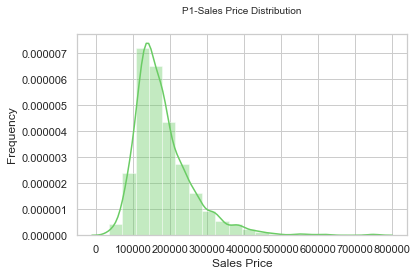

In [42]:
# The symboling categorical variable has values ranging from -3 to +3 
# Visualise the ditribution of symboling variable.

plt.figure(figsize=(6,4))
ax =sns.distplot(housing.SalePrice,bins=20,rug=False,kde=True,color='g')
ax.set_xlabel("Sales Price")
ax.set_ylabel("Frequency")
Title="P1-Sales Price Distribution"
ax.set_title(Title,fontdict={'fontsize':10},loc='center',pad=20)

plt.tight_layout();
plt.show();

In [43]:
#skewness
print( "The skewness of SalePrice is {}".format(housing['SalePrice'].skew()))

The skewness of SalePrice is 1.8828757597682129


#### **Observations**<br>
> - The Sales Price data is normally distributed with mean around 1.8M to 1.9M
> - The skewness of SalePrice is 1.8828757597682129

### 4.2: Analysis of Outliers in Numerical Variables

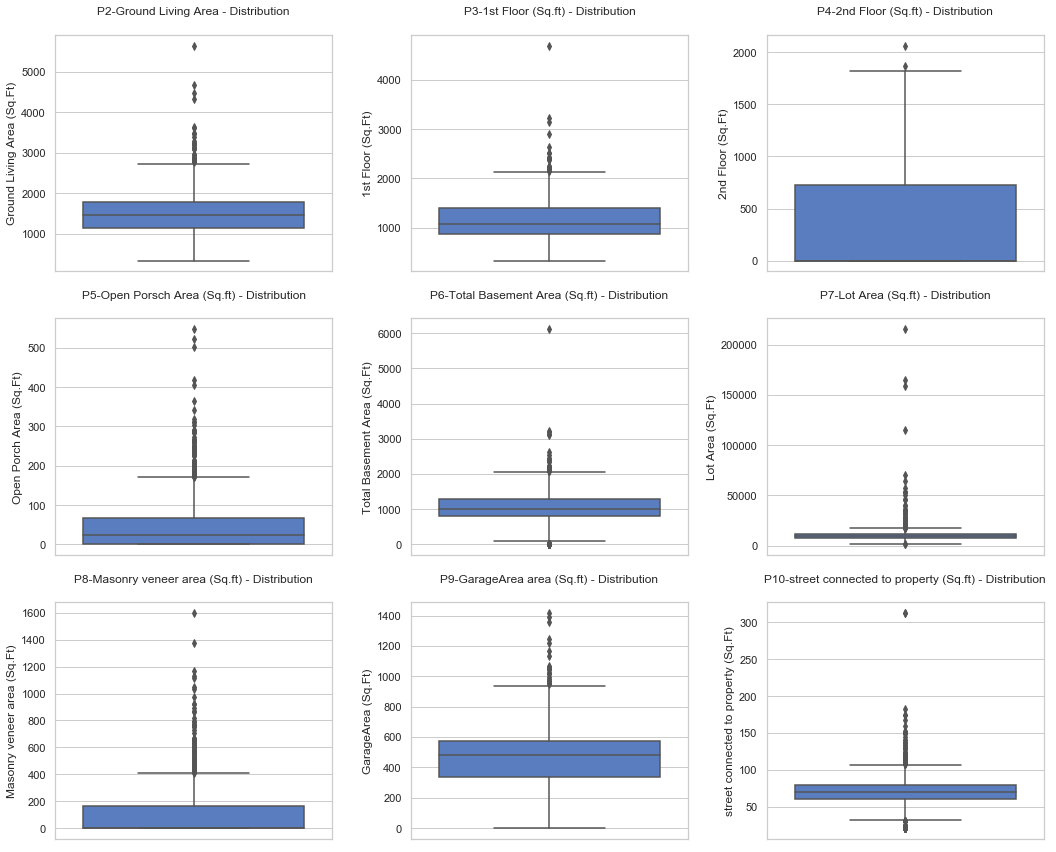

In [44]:
# Analyse for the any outliers in the Numeric variables using boxplots (univariate)
f, axn = plt.subplots(3,3,figsize=(15,12))
# GrLivArea
# 
ax1 = sns.boxplot(y=housing.GrLivArea,ax=axn[0,0],color='b')
Title="P2-Ground Living Area - Distribution"
ax1.set_title(Title,fontdict={'fontsize':12},loc='center',pad=20)
ax1.set_ylabel("Ground Living Area (Sq.Ft)")

# 1stFlrSF
# 
ax2 = sns.boxplot(y=housing['1stFlrSF'],ax=axn[0,1],color='b')
Title="P3-1st Floor (Sq.ft) - Distribution"
ax2.set_title(Title,fontdict={'fontsize':12},loc='center',pad=20)
ax2.set_ylabel("1st Floor (Sq.Ft)")

# 2stFlrSF
# 
ax3 = sns.boxplot(y=housing['2ndFlrSF'],ax=axn[0,2],color='b')
Title="P4-2nd Floor (Sq.ft) - Distribution"
ax3.set_title(Title,fontdict={'fontsize':12},loc='center',pad=20)
ax3.set_ylabel("2nd Floor (Sq.Ft)")

# OpenPorchSF
# 
ax4 = sns.boxplot(y=housing['OpenPorchSF'],ax=axn[1,0],color='b')
Title="P5-Open Porsch Area (Sq.ft) - Distribution"
ax4.set_title(Title,fontdict={'fontsize':12},loc='center',pad=20)
ax4.set_ylabel("Open Porch Area (Sq.Ft)")

# TotalBsmtSF
# 
ax5 = sns.boxplot(y=housing['TotalBsmtSF'],ax=axn[1,1],color='b')
Title="P6-Total Basement Area (Sq.ft) - Distribution"
ax5.set_title(Title,fontdict={'fontsize':12},loc='center',pad=20)
ax5.set_ylabel("Total Basement Area (Sq.Ft)")

# LotArea
# 
ax6 = sns.boxplot(y=housing['LotArea'],ax=axn[1,2],color='b')
Title="P7-Lot Area (Sq.ft) - Distribution"
ax6.set_title(Title,fontdict={'fontsize':12},loc='center',pad=20)
ax6.set_ylabel("Lot Area (Sq.Ft)")

# MasVnrArea
# 
ax7 = sns.boxplot(y=housing['MasVnrArea'],ax=axn[2,0],color='b')
Title="P8-Masonry veneer area (Sq.ft) - Distribution"
ax7.set_title(Title,fontdict={'fontsize':12},loc='center',pad=20)
ax7.set_ylabel("Masonry veneer area (Sq.Ft)")

# GarageArea
# 
ax8 = sns.boxplot(y=housing['GarageArea'],ax=axn[2,1],color='b')
Title="P9-GarageArea area (Sq.ft) - Distribution"
ax8.set_title(Title,fontdict={'fontsize':12},loc='center',pad=20)
ax8.set_ylabel("GarageArea (Sq.Ft)")

# LotFrontage
# 
ax9 = sns.boxplot(y=housing['LotFrontage'],ax=axn[2,2],color='b')
Title="P10-street connected to property (Sq.ft) - Distribution"
ax9.set_title(Title,fontdict={'fontsize':12},loc='center',pad=20)
ax9.set_ylabel("street connected to property (Sq.Ft)")

plt.tight_layout();
plt.show();

#### **Observations**<br>
> - More or less all the numerical variables have outliers and require further investigation required on the significance.

#### **Inference**<br>
> - Clean up outliers by replacing with 98% or 99% quantile values.

In [45]:
# Analysis of quantiles of numerical variables for outliers.

numerical_cols = ['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2',   
                  'BsmtUnfSF',  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                  'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                  'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

perc =[.20,.25, .40, .60, .75,.80,.90,.95,.96,.97,.98,.99] 
housing[numerical_cols].describe(percentiles=perc)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.041096,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959
std,22.024031,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,59.000000,7078.400000,0.000000,0.000000,0.000000,172.000000,755.800000,848.000000,0.000000,1066.600000,295.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000
40%,68.000000,8793.400000,0.000000,218.600000,0.000000,374.600000,910.000000,1000.200000,0.000000,1339.000000,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000
60%,70.000000,10198.200000,16.000000,525.600000,0.000000,604.400000,1088.000000,1182.000000,455.400000,1578.000000,516.000000,100.000000,40.000000,0.000000,0.000000,0.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000


In [46]:
#Outlier treatement for enginesize.

#LotFrontage
lotfrontage_limit=housing['LotFrontage'].quantile(0.98)
housing.loc[(housing['LotFrontage'] > lotfrontage_limit ),'LotFrontage'] = lotfrontage_limit

#LotArea
lotarea_limit=housing['LotArea'].quantile(0.98)
housing.loc[(housing['LotArea'] > lotarea_limit ),'LotArea'] = lotarea_limit

#MasVnrArea
masvnrarea_limit = housing['MasVnrArea'].quantile(0.98)
housing.loc[(housing['MasVnrArea'] > masvnrarea_limit ),'MasVnrArea'] = masvnrarea_limit

#BsmtFinSF1
bsmtfinsf1_limit = housing['BsmtFinSF1'].quantile(0.98)
housing.loc[(housing['BsmtFinSF1'] > bsmtfinsf1_limit ),'BsmtFinSF1'] = bsmtfinsf1_limit

#BsmtFinSF2
bsmtfinsf2_limit = housing['BsmtFinSF2'].quantile(0.98)
housing.loc[(housing.BsmtFinSF2 > bsmtfinsf2_limit ),'BsmtFinSF2'] = bsmtfinsf2_limit

#BsmtUnfSF
bsmtunfsf_limit  = housing['BsmtUnfSF'].quantile(0.98)
housing.loc[(housing['BsmtUnfSF'] > bsmtunfsf_limit ),'BsmtUnfSF'] = bsmtunfsf_limit

#TotalBsmtSF
totalbsmtsf_limit = housing['TotalBsmtSF'].quantile(0.98)
housing.loc[(housing['TotalBsmtSF'] > totalbsmtsf_limit ),'TotalBsmtSF'] = totalbsmtsf_limit

#1stFlrSF

f1stflrsf_limit = housing['1stFlrSF'].quantile(0.98)
housing.loc[(housing['1stFlrSF'] > f1stflrsf_limit ),'1stFlrSF'] = f1stflrsf_limit

#2ndFlrSF
f2ndflrsf_limit = housing['2ndFlrSF'].quantile(0.98)
housing.loc[(housing['2ndFlrSF'] > f2ndflrsf_limit ),'2ndFlrSF'] = f2ndflrsf_limit

#GrLivArea
grlivarea_limit = housing['GrLivArea'].quantile(0.98)
housing.loc[(housing['GrLivArea'] > grlivarea_limit ),'GrLivArea'] = grlivarea_limit

#GarageArea
garagearea_limit = housing['GarageArea'].quantile(0.98)
housing.loc[(housing['GarageArea'] > garagearea_limit ),'GarageArea'] = garagearea_limit

#WoodDeckSF
wooddecksf_limit = housing['WoodDeckSF'].quantile(0.98)
housing.loc[(housing['WoodDeckSF'] > wooddecksf_limit ),'WoodDeckSF'] = wooddecksf_limit

#OpenPorchSF
openporchsf_limit = housing['OpenPorchSF'].quantile(0.98)
housing.loc[(housing['OpenPorchSF'] > openporchsf_limit ),'OpenPorchSF'] = openporchsf_limit

#EnclosedPorch
enclosedporch_limit = housing['EnclosedPorch'].quantile(0.98)
housing.loc[(housing.EnclosedPorch > enclosedporch_limit ),'EnclosedPorch'] = enclosedporch_limit

#3SsnPorch
f3ssnporch_limit = housing['3SsnPorch'].quantile(0.98)
housing.loc[(housing['3SsnPorch'] > f3ssnporch_limit ),'3SsnPorch'] = f3ssnporch_limit

#ScreenPorch
screenporch_limit = housing['ScreenPorch'].quantile(0.98)
housing.loc[(housing['ScreenPorch'] > screenporch_limit ),'ScreenPorch'] = screenporch_limit

In [47]:
perc =[.20,.25, .40, .60, .75,.80,.90,.95,.96,.97,.98,.99] 
housing[numerical_cols].describe(percentiles=perc)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000
mean,69.396301,9884.318219,98.486712,436.678219,41.938082,563.631507,1048.256986,1155.655068,343.673151,1504.468767,470.137534,92.019178,45.170959,21.067260,0.0,13.677534
std,18.844773,4269.103743,159.719585,424.424497,136.258146,431.331047,398.396991,358.974939,427.613429,483.292715,205.938812,117.263208,59.666175,56.943392,0.0,48.367922
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
20%,59.000000,7078.400000,0.000000,0.000000,0.000000,172.000000,755.800000,848.000000,0.000000,1066.600000,295.600000,0.000000,0.000000,0.000000,0.0,0.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.0,0.000000
40%,68.000000,8793.400000,0.000000,218.600000,0.000000,374.600000,910.000000,1000.200000,0.000000,1339.000000,440.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,70.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.0,0.000000
60%,70.000000,10198.200000,16.000000,525.600000,0.000000,604.400000,1088.000000,1182.000000,455.400000,1578.000000,516.000000,100.000000,40.000000,0.000000,0.0,0.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.0,0.000000


#### **Observations**<br>
> -The numerical variables which are having outliers , the values beyond 98% quantile are replaced with 98% quantile values. 

## Step 5: Bivariate Analysis

### 5.1: Visualising Categorical Variables  against Sales Price

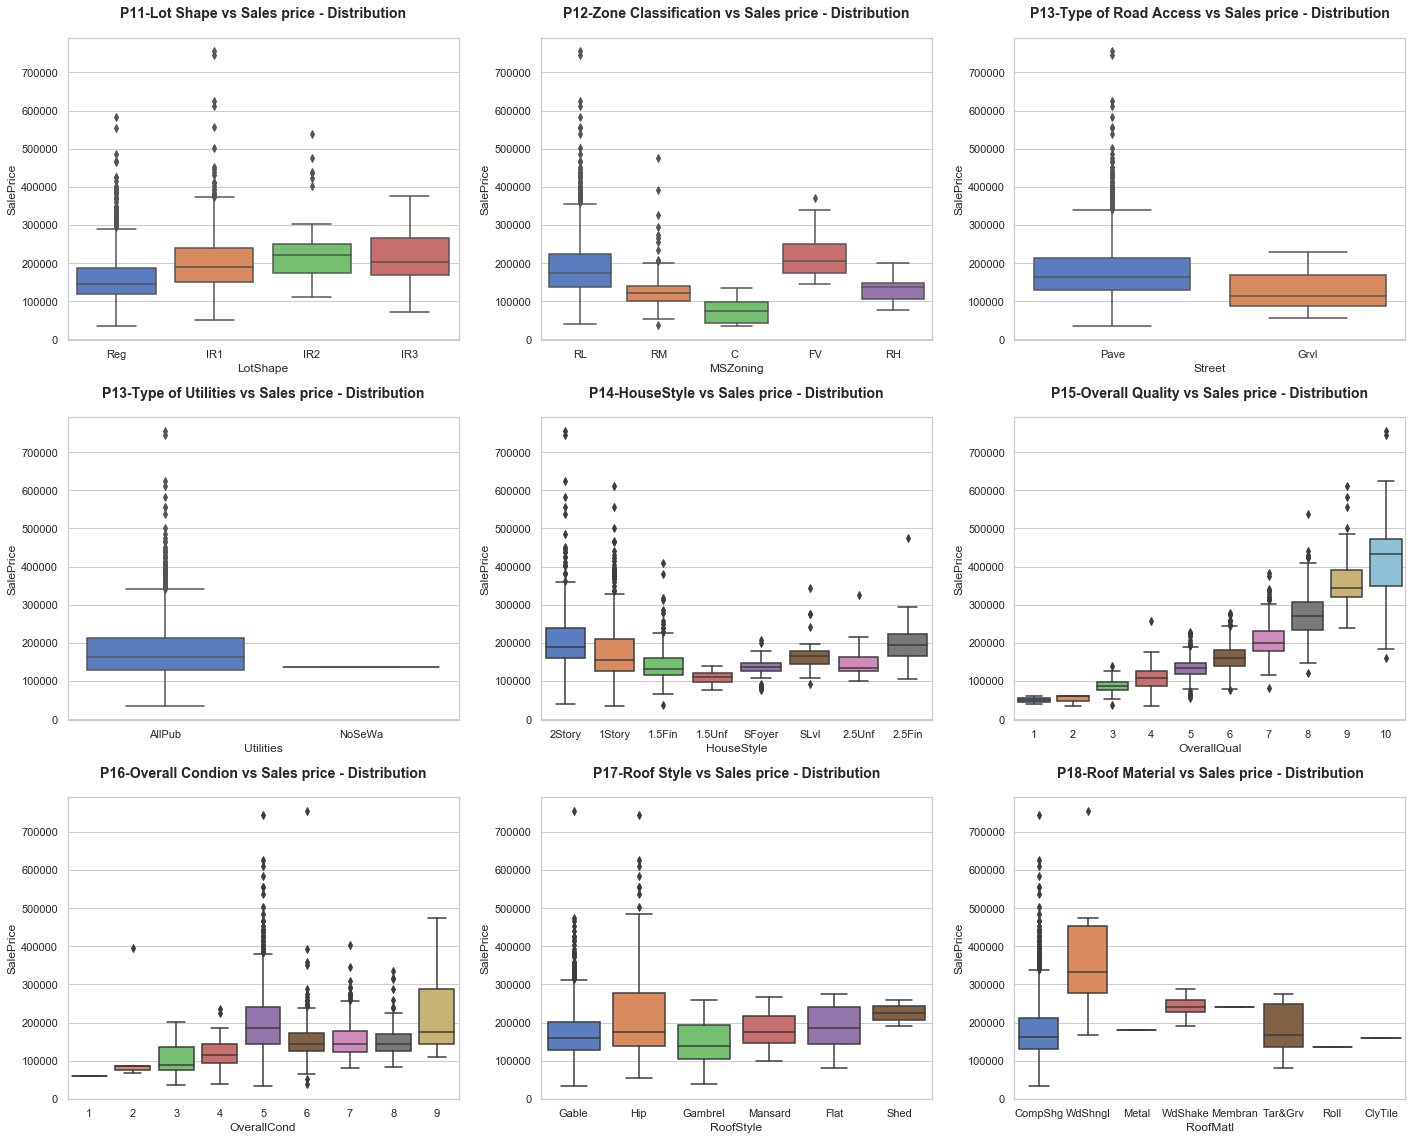

In [48]:
#Visualize the distribution of categorical variables against the price to see the
# distribution.

#LotShape
f, axn = plt.subplots(3,3,figsize=(20,16))
ax1 = sns.boxplot(x = 'LotShape', y = 'SalePrice', data = housing,ax=axn[0,0])
Title="P11-Lot Shape vs Sales price - Distribution"
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

# MSZoning
ax2 =sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing,ax=axn[0,1])
Title="P12-Zone Classification vs Sales price - Distribution"
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

# Street
ax3 =sns.boxplot(x = 'Street', y = 'SalePrice', data = housing,ax=axn[0,2])
Title="P13-Type of Road Access vs Sales price - Distribution"
ax3.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

# Utilities
ax4 =sns.boxplot(x = 'Utilities', y = 'SalePrice', data = housing,ax=axn[1,0])
Title="P13-Type of Utilities vs Sales price - Distribution"
ax4.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

# HouseStyle
ax5 =sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = housing,ax=axn[1,1])
Title="P14-HouseStyle vs Sales price - Distribution"
ax5.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

# OverallQual
ax6 =sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = housing,ax=axn[1,2])
Title="P15-Overall Quality vs Sales price - Distribution"
ax6.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

# OverallCond
ax7 =sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = housing,ax=axn[2,0])
Title="P16-Overall Condion vs Sales price - Distribution"
ax7.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

# RoofStyle
ax8 =sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing,ax=axn[2,1])
Title="P17-Roof Style vs Sales price - Distribution"
ax8.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

# RoofMatl
ax9 =sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = housing,ax=axn[2,2])
Title="P18-Roof Material vs Sales price - Distribution"
ax9.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout()
plt.show();

#### **Observations**<br>
> - From the distribution of categorical variables , following are the observations ;
  - The Average Sales price are higher for ;
      - Moderately or irregular shape of the properties.
      - floating village residential and residential low density houses zones.
      - houses having pavement type access to the property.
      - houses having all public utilities (E,G,W and S).
      - 1st and 2nd Story style houses.
      - houses constructed with excellent materials and finish.
      - Overall condition is expected Excellent 
      - roof style `Hip` and of the materials `Wood Shingles`.

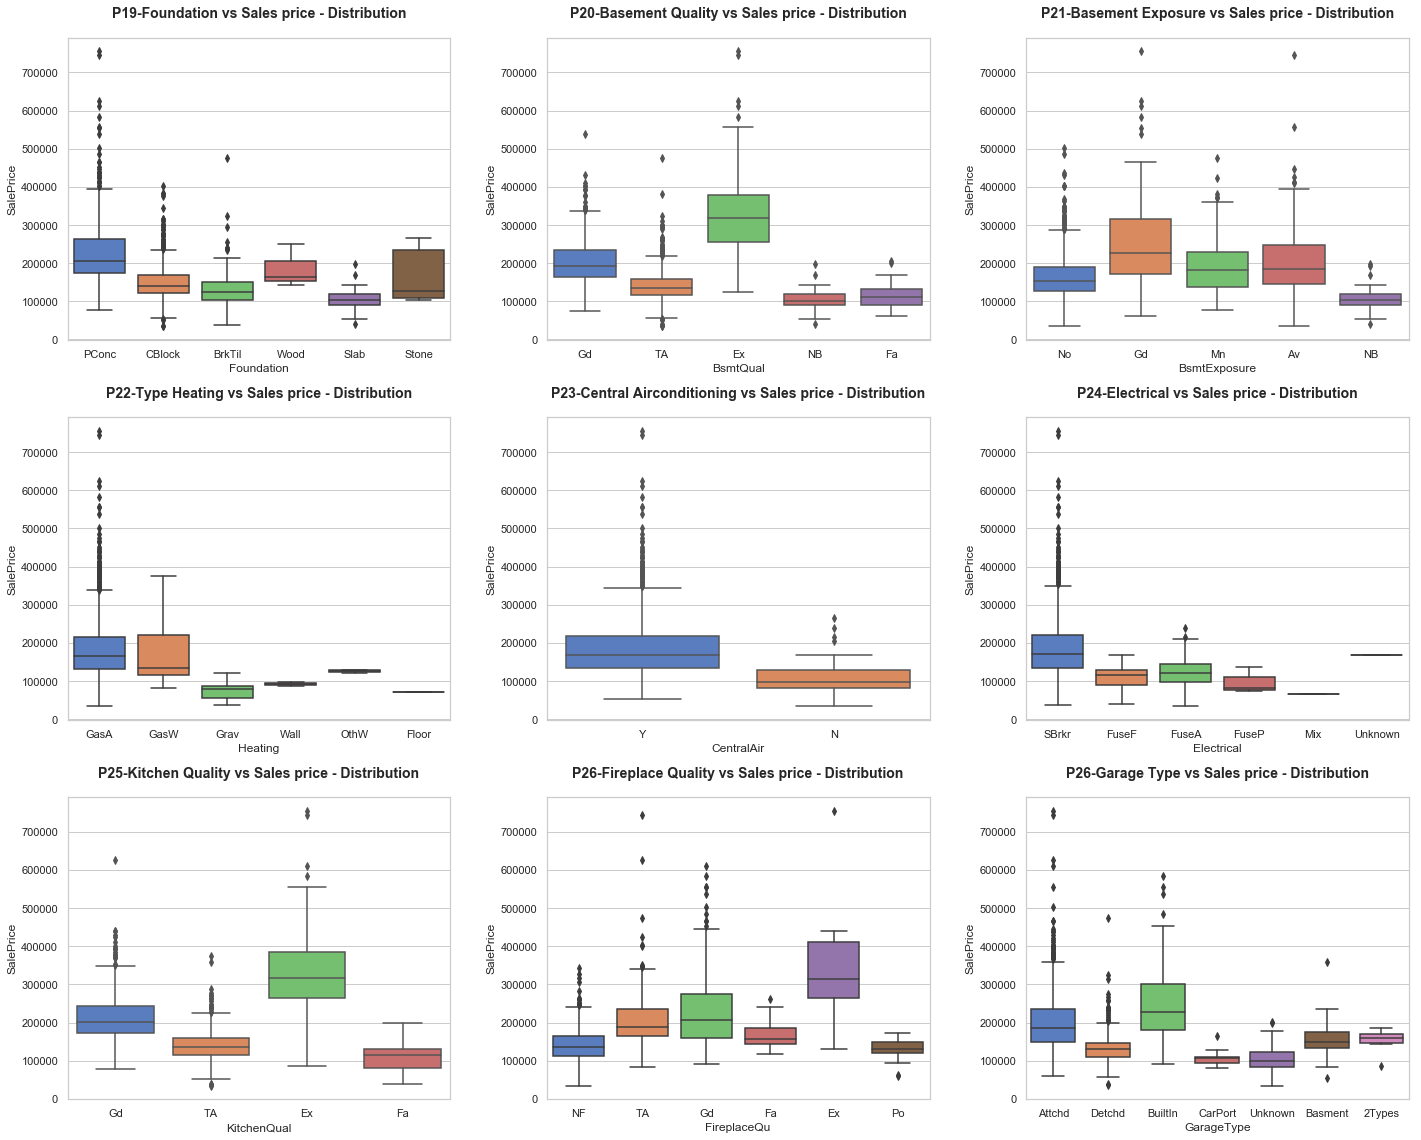

In [49]:
#Visualize the distribution of categorical variables against the price to see the
# distribution.

#Foundation
f, axn = plt.subplots(3,3,figsize=(20,16))
ax1 = sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing,ax=axn[0,0])
Title="P19-Foundation vs Sales price - Distribution"
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

#BsmtQual
ax2 = sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housing,ax=axn[0,1])
Title="P20-Basement Quality vs Sales price - Distribution"
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

#BsmtExposure
ax3 = sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = housing,ax=axn[0,2])
Title="P21-Basement Exposure vs Sales price - Distribution"
ax3.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

#Heating
ax4 = sns.boxplot(x = 'Heating', y = 'SalePrice', data = housing,ax=axn[1,0])
Title="P22-Type Heating vs Sales price - Distribution"
ax4.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

#CentralAir
ax5 = sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = housing,ax=axn[1,1])
Title="P23-Central Airconditioning vs Sales price - Distribution"
ax5.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

#Electrical
ax6 = sns.boxplot(x = 'Electrical', y = 'SalePrice', data = housing,ax=axn[1,2])
Title="P24-Electrical vs Sales price - Distribution"
ax6.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

#KitchenQual
ax7 = sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = housing,ax=axn[2,0])
Title="P25-Kitchen Quality vs Sales price - Distribution"
ax7.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

#FireplaceQu
ax8 = sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = housing,ax=axn[2,1])
Title="P26-Fireplace Quality vs Sales price - Distribution"
ax8.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

#GarageType
ax9 = sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing,ax=axn[2,2])
Title="P26-Garage Type vs Sales price - Distribution"
ax9.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout()
plt.show();

### 5.2: Visualising Categorical Year Binned (Categorical) Variables  against Sales Price

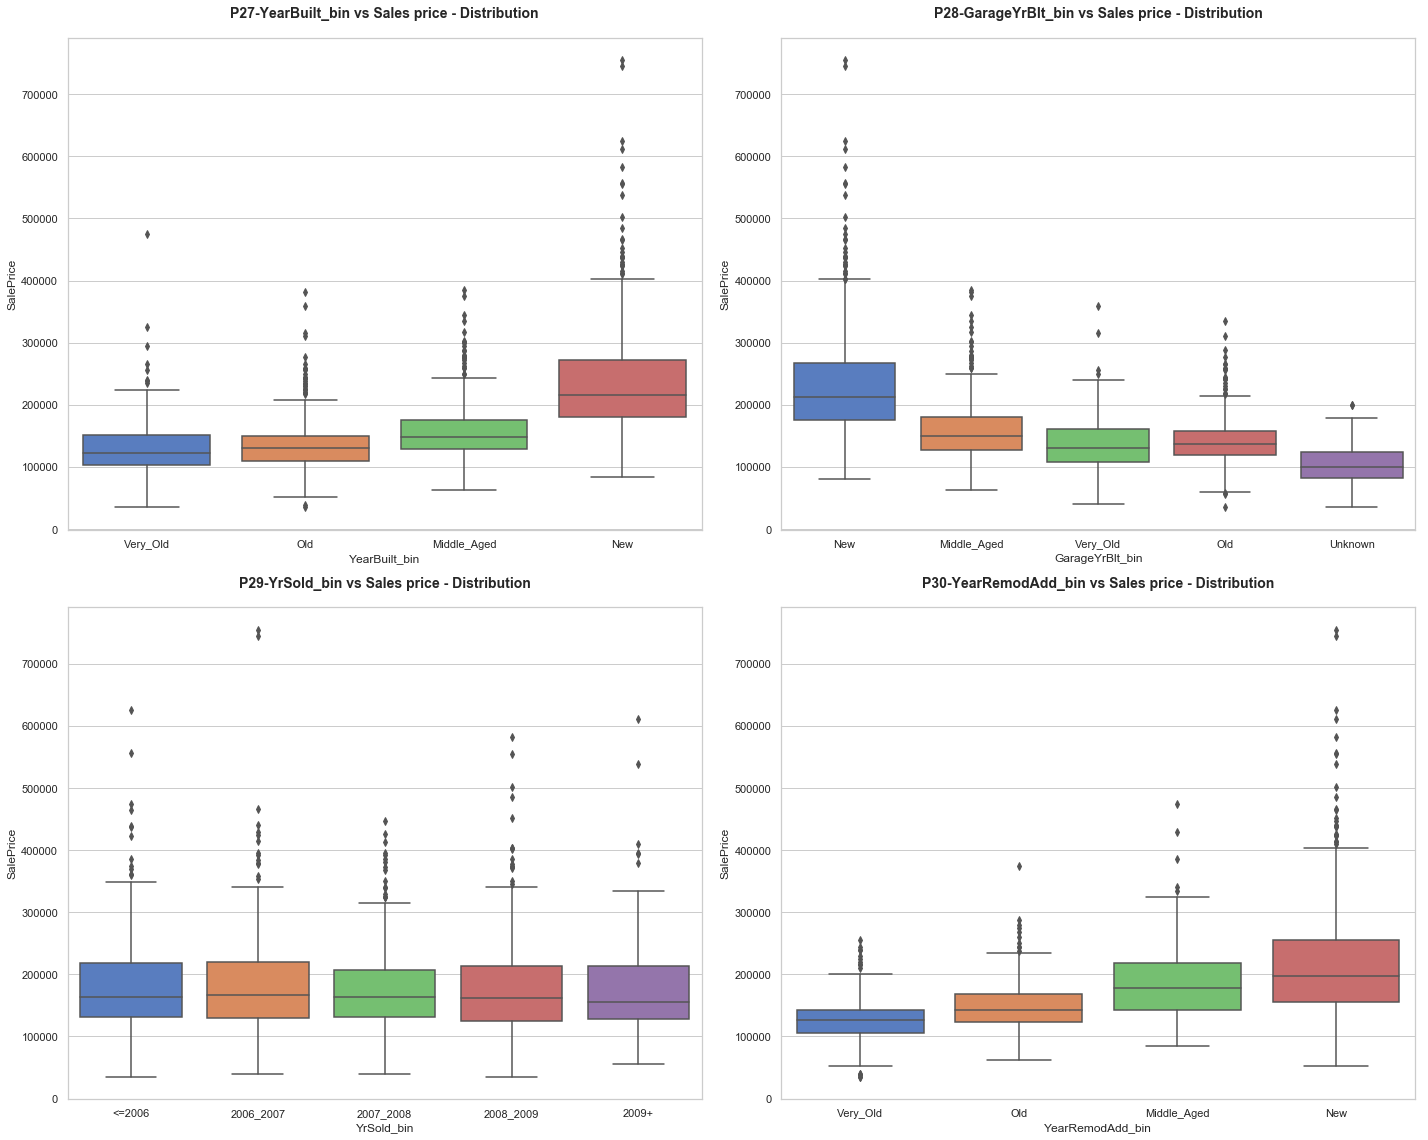

In [50]:
#Visualize the distribution of Date type categorical variables against the price to see the
# distribution.

f, axn = plt.subplots(2,2,figsize=(20,16))

#YearBuilt_bin
ax1 = sns.boxplot(x = 'YearBuilt_bin', y = 'SalePrice', data = housing,ax=axn[0,0])
Title="P27-YearBuilt_bin vs Sales price - Distribution"
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

#GarageYrBt_bin
ax2 = sns.boxplot(x = 'GarageYrBlt_bin', y = 'SalePrice', data = housing,ax=axn[0,1])
Title="P28-GarageYrBlt_bin vs Sales price - Distribution"
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

#YrSold_bin
ax3 = sns.boxplot(x = 'YrSold_bin', y = 'SalePrice', data = housing,ax=axn[1,0])
Title="P29-YrSold_bin vs Sales price - Distribution"
ax3.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

#YearRemodAdd_bin
ax3 = sns.boxplot(x = 'YearRemodAdd_bin', y = 'SalePrice', data = housing,ax=axn[1,1])
Title="P30-YearRemodAdd_bin vs Sales price - Distribution"
ax3.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout()
plt.show();

#### **Observations**<br>
> - From the distribution of categorical variables , following are the observations ;
  - The Average Sales price are higher for ;
      - Poured Concrete or Stone type foundational houses.
      - Basement quality which excellent conditions and features.
      - Basement should have either good or average exposure to walkout or garden level walls
      - houses having Gas forced warm air furnace or gas hot water or steam heat
      - central air conditining present.
      - Electrical equipments of type Standard Circuit Breakers & Romex
      - having Excellent Quality Kitchen and fireplaces
      - having Built-in Garages (Garage part of house)
  - Also, The average sales price are higher for ;
      - House built(YearBuilt) recently (New)
      - House having garage built recently (New)
      - House remodelled recently 
      - However, the price remains more less same (on an average) for years (recent years) of resold houses 

### 5.2: Visualising Numerical Variables against Sales Price

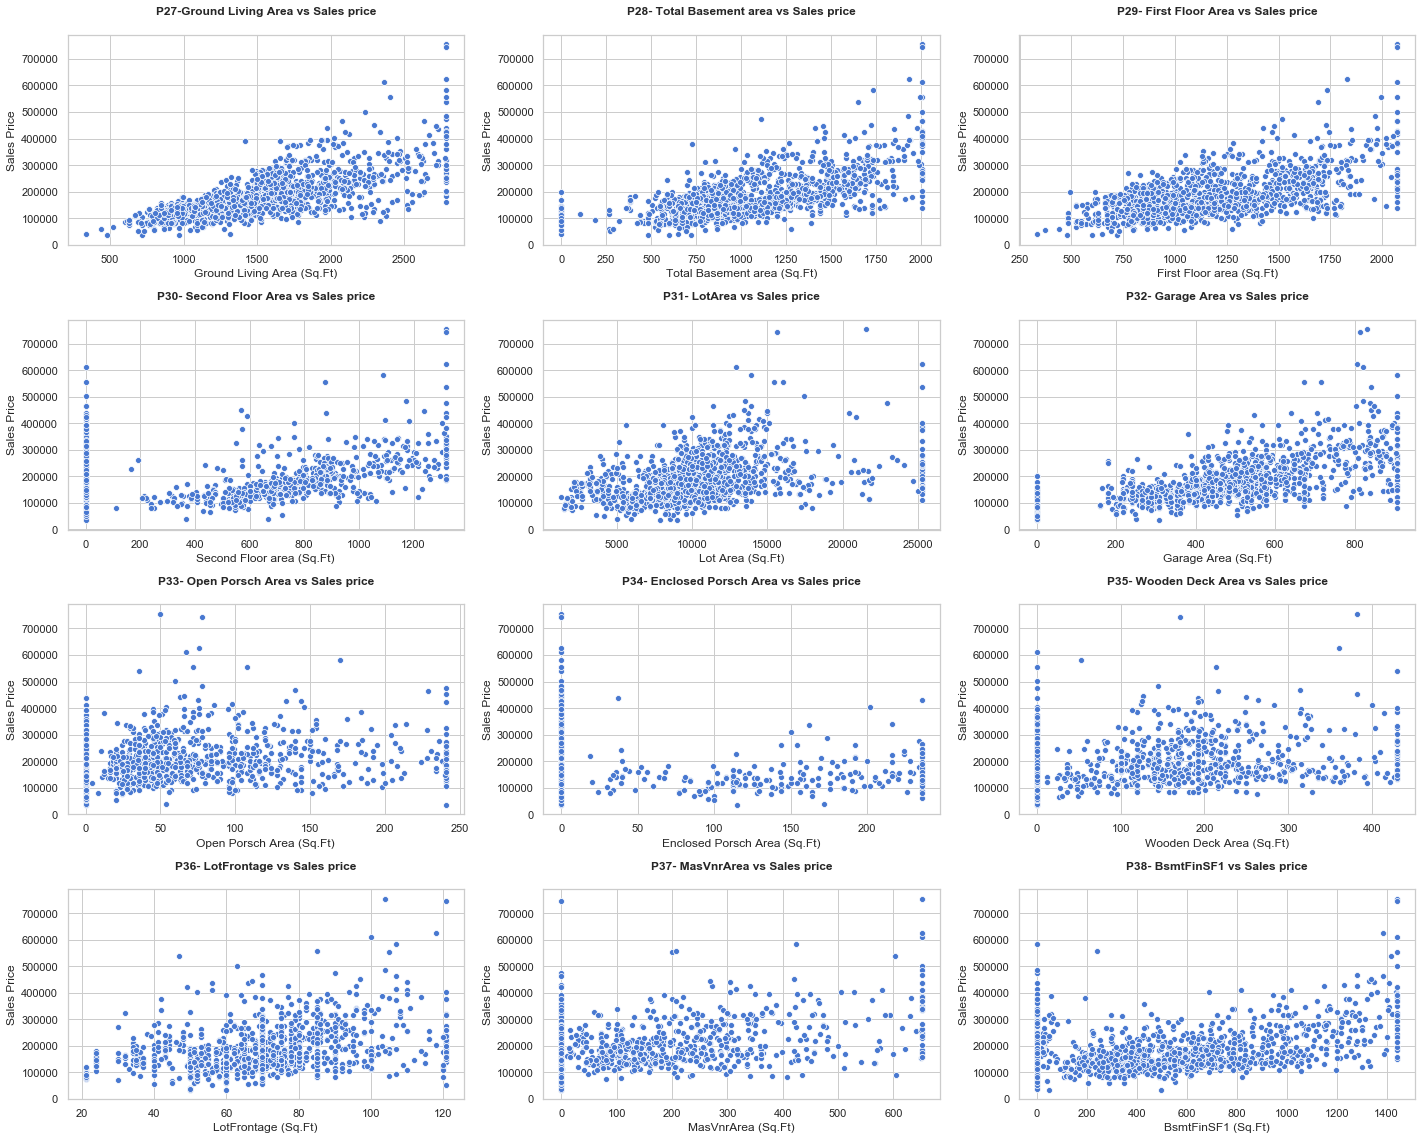

In [51]:
f, axn = plt.subplots(4,3,figsize=(20,16))

#GrLivArea (Ground Floor Living Area)
ax1 = sns.scatterplot(x='GrLivArea',y='SalePrice',data=housing,ax=axn[0,0])
Title="P27-Ground Living Area vs Sales price"
ax1.set_ylabel("Sales Price")
ax1.set_xlabel("Ground Living Area (Sq.Ft)")
ax1.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)

#TotalBsmtSF (Basement Floor Area)
ax2 = sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=housing,ax=axn[0,1])
Title="P28- Total Basement area vs Sales price"
ax2.set_ylabel("Sales Price")
ax2.set_xlabel("Total Basement area (Sq.Ft)")
ax2.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)

#1stFlrSF (1St Floor Area)
ax3 = sns.scatterplot(x='1stFlrSF',y='SalePrice',data=housing,ax=axn[0,2])
Title="P29- First Floor Area vs Sales price"
ax3.set_ylabel("Sales Price")
ax3.set_xlabel("First Floor area (Sq.Ft)")
ax3.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)

#2ndFlrSF (1St Floor Area)
ax4 = sns.scatterplot(x='2ndFlrSF',y='SalePrice',data=housing,ax=axn[1,0])
Title="P30- Second Floor Area vs Sales price"
ax4.set_ylabel("Sales Price")
ax4.set_xlabel("Second Floor area (Sq.Ft)")
ax4.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)

#LotArea (Lot Area)
ax5 = sns.scatterplot(x='LotArea',y='SalePrice',data=housing,ax=axn[1,1])
Title="P31- LotArea vs Sales price"
ax5.set_ylabel("Sales Price")
ax5.set_xlabel("Lot Area (Sq.Ft)")
ax5.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)

#GarageArea (Garage Area)
ax5 = sns.scatterplot(x='GarageArea',y='SalePrice',data=housing,ax=axn[1,2])
Title="P32- Garage Area vs Sales price"
ax5.set_ylabel("Sales Price")
ax5.set_xlabel("Garage Area (Sq.Ft)")
ax5.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)

#OpenPorchSF  (Garage Area)
ax6 = sns.scatterplot(x='OpenPorchSF',y='SalePrice',data=housing,ax=axn[2,0])
Title="P33- Open Porsch Area vs Sales price"
ax6.set_ylabel("Sales Price")
ax6.set_xlabel("Open Porsch Area (Sq.Ft)")
ax6.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)

#EnclosedPorch (Enclosed Porsch Area)
ax7 = sns.scatterplot(x='EnclosedPorch',y='SalePrice',data=housing,ax=axn[2,1])
Title="P34- Enclosed Porsch Area vs Sales price"
ax7.set_ylabel("Sales Price")
ax7.set_xlabel("Enclosed Porsch Area (Sq.Ft)")
ax7.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)

#WoodDeckSF (Wood Deck Area)
ax8 = sns.scatterplot(x='WoodDeckSF',y='SalePrice',data=housing,ax=axn[2,2])
Title="P35- Wooden Deck Area vs Sales price"
ax8.set_ylabel("Sales Price")
ax8.set_xlabel("Wooden Deck Area (Sq.Ft)")
ax8.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)

#LotFrontage (Street Conenected property)
ax9 = sns.scatterplot(x='LotFrontage',y='SalePrice',data=housing,ax=axn[3,0])
Title="P36- LotFrontage vs Sales price"
ax9.set_ylabel("Sales Price")
ax9.set_xlabel("LotFrontage (Sq.Ft)")
ax9.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)

#MasVnrArea (Masonry veneer area)
ax10 = sns.scatterplot(x='MasVnrArea',y='SalePrice',data=housing,ax=axn[3,1])
Title="P37- MasVnrArea vs Sales price"
ax10.set_ylabel("Sales Price")
ax10.set_xlabel("MasVnrArea (Sq.Ft)")
ax10.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)


#BsmtFinSF1 (Type 1 Rating Finished Basement Area)
ax11 = sns.scatterplot(x='BsmtFinSF1',y='SalePrice',data=housing,ax=axn[3,2])
Title="P38- BsmtFinSF1 vs Sales price"
ax11.set_ylabel("Sales Price")
ax11.set_xlabel("BsmtFinSF1 (Sq.Ft)")
ax11.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout()
plt.show();

#### **Observations**<br>
> -The scatter plot distribution of numerical variables depicts the variance visually more or less of a linear model.

### 5.3: Visualizing the correlation between variables.

In [52]:
numerical_corr_cols = ['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2',   
                  'BsmtUnfSF',  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
                   'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                   'ScreenPorch','SalePrice']

housing_numerical = housing[numerical_corr_cols]
housing_numerical.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SalePrice'],
      dtype='object')

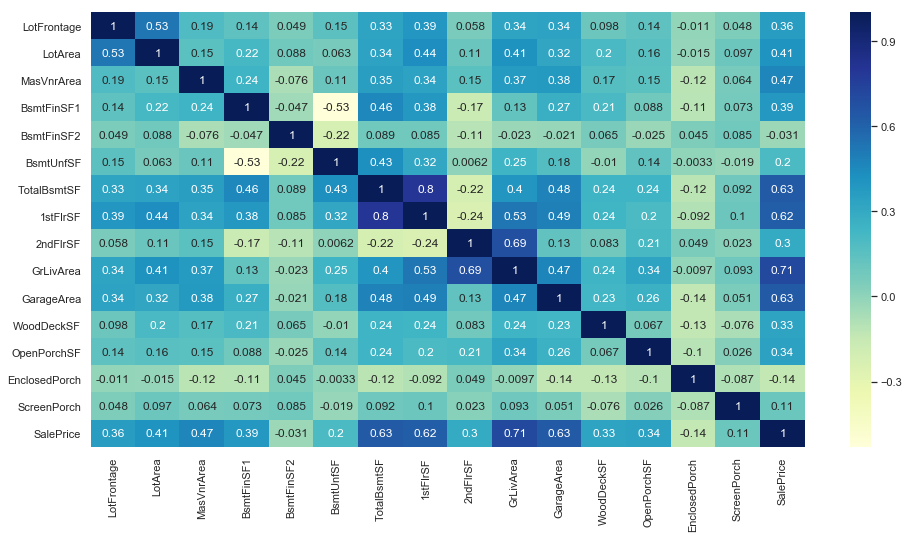

In [53]:
# correlation matrix
cor = housing_numerical.corr()
# plotting correlations on a heatmap
plt.figure(figsize=(16,8))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show();

#### **Observations**<br>
>- The heatmap shows some useful insights:
>- Correlation of SalesPrice with independent variables:
 - Price is highly (positively) correlated with folloowing variables ;
  - TotalBsmtSF - `0.63` 
  - 1stFlrSF    - `0.62`
  - GrLivArea   - `0.71`
  - GarageArea  - `0.63`
  - MasVnrArea  - `0.47`
  - LotArea     - `0.41`
  - BsmtFinSF1  - `0.39`
  - WoodDeckSF  - `0.32`
  - OpenPorchSF - `0.34`
  - 2ndFlrSF    - `0.30`
>- All these variables represent square feet Area of Basement,living room, garage,porsch and lot areas . The price of the house positively correlated with these factors.
>- Price is negatively correlated to ```BsmtFinSF2``` and ```EnclosedPorch``` (-0.031 and -0.14 respectively.  
>- Correlation among independent variables:
   - Many independent variables are highly correlated for e.g.,
   - `TotalBsmtSF` is highly correlated with `1stFlrSF`, `GrLivArea`, `GarageArea`, `BsmtFinSF1`,` MasVnrArea` and  `LotArea` -`0.80`,`0.40`,`0.48`,`0.46`,`0.38` and `0.32` respectively.
  - 1stFlrSF is highly correlated with `TotalBsmtSF`,`GrLivArea`, `GarageArea`,`BsmtFinSF1`,` MasVnrArea` and  `LotArea` as `0.80`, `0.53`,`0.49`,`0.34`,`0.44` respectively.
  - Similarly, `GrLivArea` is highly correlated with `2ndFlrSF` (`0.69`),`1stFlrSF` (`0.53`),`GarageArea`(`0.47`),`TotalBsmtSF`(`0.40`),` MasVnrArea`(`0.37`) and  `LotArea` (`0.41`).
>- Thus, while building the model, we'll have to pay attention to high correlation variables  such as linear because of which the model will suffer more due to  multicollinearity.

## STEP 6: Data Preparation

In [54]:
housing.select_dtypes(include=['object','category']).columns
housing.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'YearBuilt_bin', 'GarageYrBlt_bin',
       'YrSold_bin', 'YearRemodAdd_bin'],
      dtype='object')

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MoSold', 'SalePrice'],
      dtype='object')

In [55]:
housing_categorical = housing.select_dtypes(include=['object','category'])
housing_numerical = housing.select_dtypes(include=['int64','float64'])

### 6.1: Converting binary variables 

In [56]:
housing_categorical.CentralAir.value_counts()
housing_categorical['Street'].value_counts()
housing_categorical['Utilities'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [57]:
# Replace 'Y' with value 1 and 'N' with 0.
housing_categorical['CentralAir'] = housing_categorical['CentralAir'].apply({'N' : 0, 'Y': 1}.get)
housing_categorical['Street'] = housing_categorical['Street'].apply({'Grvl' : 0, 'Pave': 1}.get)
housing_categorical['Utilities'] = housing_categorical['Utilities'].apply({'NoSeWa' : 0, 'AllPub': 1}.get)

### 6.2: Create Dummy Features for categorical variables with multiple levels (one-hot encoding)

In [58]:
# Creating a dummy variable for the categorical variables and dropping the first one.

dummy_1 = pd.get_dummies(housing_categorical[['MSZoning','MSSubClass']], drop_first=True)
housing_categorical = pd.concat([housing_categorical, dummy_1], axis=1)

# Drop the original variables.
housing_categorical = housing_categorical.drop(['MSZoning','MSSubClass'],axis=1)

In [59]:
housing_categorical.head()

,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,YearBuilt_bin,GarageYrBlt_bin,YrSold_bin,YearRemodAdd_bin,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,1,Reg,Lvl,1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,1,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,NF,Attchd,RFn,2,TA,TA,Y,WD,Normal,New,New,2007_2008,New,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,Reg,Lvl,1,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,1,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,WD,Normal,Middle_Aged,Middle_Aged,2006_2007,Old,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,IR1,Lvl,1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,1,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,WD,Normal,New,New,2007_2008,New,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,IR1,Lvl,1,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,1,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,WD,Abnorml,Very_Old,New,<=2006,Old,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,IR1,Lvl,1,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,1,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,WD,Normal,New,New,2007_2008,New,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [60]:
# Creating dummy variables for the remaining categorical variables and dropping the level which are trivals.

#LotShape variable
dummy_2 = pd.get_dummies(housing_categorical['LotShape'],prefix='LotShape')
# Dropping LotShape_IR3 column
dummy_2 = dummy_2.drop(['LotShape_IR3'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_2], axis=1)

#LandContour variable.
dummy_3 = pd.get_dummies(housing_categorical['LandContour'],prefix='LandContour')
# Dropping LotShape_IR3 column
dummy_3 = dummy_3.drop(['LandContour_Low'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_3], axis=1)

#LotConfig variable.
dummy_4 = pd.get_dummies(housing_categorical['LotConfig'],prefix='LotConfig')
# Dropping LotConfig_FR3 column
dummy_4 = dummy_4.drop(['LotConfig_FR3'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_4], axis=1)

#LandSlope variable.
dummy_5 = pd.get_dummies(housing_categorical['LandSlope'],prefix='LandSlope')
# Dropping LandSlope_Sev column
dummy_5 = dummy_5.drop(['LandSlope_Sev'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_5], axis=1)

#Neighborhood variable.
dummy_6 = pd.get_dummies(housing_categorical['Neighborhood'],prefix='Neighborhood')
# Dropping Neighborhood_Blueste column
dummy_6 = dummy_6.drop(['Neighborhood_Blueste'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_6], axis=1)

#Condition1 variable.
dummy_7 = pd.get_dummies(housing_categorical['Condition1'],prefix='Condition1')
# Dropping Condition1_RRNe column
dummy_7 = dummy_7.drop(['Condition1_RRNe'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_7], axis=1)

#Condition2 variable.
dummy_8 = pd.get_dummies(housing_categorical['Condition2'],prefix='Condition2')
# Dropping Condition2_PosA column
dummy_8 = dummy_8.drop(['Condition2_PosA'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_8], axis=1)

#BldgType variable.
dummy_9 = pd.get_dummies(housing_categorical['BldgType'],prefix='BldgType')
# Dropping Condition2_2fmCon column
dummy_9 = dummy_9.drop(['BldgType_2fmCon'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_9], axis=1)

#HouseStyle variable.
dummy_10 = pd.get_dummies(housing_categorical['HouseStyle'],prefix='HouseStyle')
# Dropping HouseStyle_2.5Fin column
dummy_10 = dummy_10.drop(['HouseStyle_2.5Fin'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_10], axis=1)

#OverallQual variable.
dummy_11 = pd.get_dummies(housing_categorical['OverallQual'],prefix='OverallQual')
# Dropping OverallQual_1 column
dummy_11 = dummy_11.drop(['OverallQual_1'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_11], axis=1)

#OverallCond variable.
dummy_12 = pd.get_dummies(housing_categorical['OverallCond'],prefix='OverallCond')
# Dropping OverallCond_1 column
dummy_12 = dummy_12.drop(['OverallCond_1'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_12], axis=1)

#RoofStyle variable.
dummy_13 = pd.get_dummies(housing_categorical['RoofStyle'],prefix='RoofStyle')
# Dropping RoofStyle_Shed column
dummy_13 = dummy_13.drop(['RoofStyle_Shed'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_13], axis=1)

#RoofMatl variable.
dummy_14 = pd.get_dummies(housing_categorical['RoofMatl'],prefix='RoofMatl')
# Dropping RoofMatl_Metal column
dummy_14 = dummy_14.drop(['RoofMatl_Metal'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_14], axis=1)

#Exterior1st variable.
dummy_15 = pd.get_dummies(housing_categorical['Exterior1st'],prefix='Exterior1st')
# Dropping Exterior1st_CBlock column
dummy_15 = dummy_15.drop(['Exterior1st_CBlock'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_15], axis=1)

#Exterior2nd variable.
dummy_16 = pd.get_dummies(housing_categorical['Exterior2nd'],prefix='Exterior2nd')
# Dropping Exterior2nd_CBlock column
dummy_16 = dummy_16.drop(['Exterior2nd_CBlock'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_16], axis=1)

In [61]:
# Drop the original categorical for the dummy variables.
drop_cols_1 = ['LotShape','LandContour','LotConfig','LandSlope','Neighborhood',
               'Condition1','Condition2','BldgType','HouseStyle','OverallQual',
               'OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd']
housing_categorical = housing_categorical.drop(drop_cols_1,axis=1)

In [62]:
#MasVnrType variable.
dummy_17 = pd.get_dummies(housing_categorical['MasVnrType'],prefix='MasVnrType')
# Dropping MasVnrType_None column
dummy_17 = dummy_17.drop(['MasVnrType_None'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_17], axis=1)

#ExterQual variable.
dummy_18 = pd.get_dummies(housing_categorical['ExterQual'],prefix='ExterQual')
# Dropping ExterQual_Fa column
dummy_18 = dummy_18.drop(['ExterQual_Fa'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_18], axis=1)

#ExterCond variable.
dummy_19 = pd.get_dummies(housing_categorical['ExterCond'],prefix='ExterCond')
# Dropping ExterCond_Po column
dummy_19 = dummy_19.drop(['ExterCond_Po'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_19], axis=1)

#Foundation variable.
dummy_20 = pd.get_dummies(housing_categorical['Foundation'],prefix='Foundation')
# Dropping Foundation_Wood column
dummy_20 = dummy_20.drop(['Foundation_Wood'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_20], axis=1)

#BsmtQual variable.
dummy_21 = pd.get_dummies(housing_categorical['BsmtQual'],prefix='BsmtQual')
# Dropping BsmtQual_NB column
dummy_21 = dummy_21.drop(['BsmtQual_NB'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_21], axis=1)

#BsmtCond variable.
dummy_22 = pd.get_dummies(housing_categorical['BsmtCond'],prefix='BsmtCond')
# Dropping BsmtCond_NB column
dummy_22 = dummy_22.drop(['BsmtCond_NB'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_22], axis=1)

#BsmtExposure variable.
dummy_23 = pd.get_dummies(housing_categorical['BsmtExposure'],prefix='BsmtExposure')
# Dropping BsmtExposure_NB column
dummy_23 = dummy_23.drop(['BsmtExposure_NB'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_23], axis=1)

#BsmtFinType1 variable.
dummy_24 = pd.get_dummies(housing_categorical['BsmtFinType1'],prefix='BsmtFinType1')
# Dropping BsmtFinType1_NB column
dummy_24 = dummy_24.drop(['BsmtFinType1_NB'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_24], axis=1)

#BsmtFinType2 variable.
dummy_25 = pd.get_dummies(housing_categorical['BsmtFinType2'],prefix='BsmtFinType2')
# Dropping BsmtFinType2_NB column
dummy_25 = dummy_25.drop(['BsmtFinType2_NB'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_25], axis=1)

#Heating variable.
dummy_26 = pd.get_dummies(housing_categorical['Heating'],prefix='Heating')
# Dropping Heating_Floor column
dummy_26 = dummy_26.drop(['Heating_Floor'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_26], axis=1)

#HeatingQC variable.
dummy_27 = pd.get_dummies(housing_categorical['HeatingQC'],prefix='HeatingQC')
# Dropping HeatingQC_Po column
dummy_27 = dummy_27.drop(['HeatingQC_Po'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_27], axis=1)

#Electrical variable.
dummy_28 = pd.get_dummies(housing_categorical['Electrical'],prefix='Electrical')
# Dropping Electrical_Unknown column
dummy_28 = dummy_28.drop(['Electrical_Unknown'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_28], axis=1)

#BsmtFullBath variable.
dummy_29 = pd.get_dummies(housing_categorical['BsmtFullBath'],prefix='BsmtFullBath')
# Dropping BsmtFullBath_3 column
dummy_29 = dummy_29.drop(['BsmtFullBath_3'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_29], axis=1)

#BsmtHalfBath variable.
dummy_30 = pd.get_dummies(housing_categorical['BsmtHalfBath'],prefix='BsmtHalfBath')
# Dropping BsmtHalfBath_2 column
dummy_30 = dummy_30.drop(['BsmtHalfBath_2'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_30], axis=1)

#FullBath variable.
dummy_31 = pd.get_dummies(housing_categorical['FullBath'],prefix='FullBath')
# Dropping FullBath_0 column
dummy_31 = dummy_31.drop(['FullBath_0'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_31], axis=1)

In [63]:
# Drop the original variables for dummies.
drop_cols_2 = ['MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
               'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
               'Heating','HeatingQC','Electrical','BsmtFullBath','BsmtHalfBath',
               'FullBath']
housing_categorical = housing_categorical.drop(drop_cols_2,axis=1)

In [64]:
#HalfBath variable.
dummy_32 = pd.get_dummies(housing_categorical['HalfBath'],prefix='HalfBath')
# Dropping HalfBath_2 column
dummy_32 = dummy_32.drop(['HalfBath_2'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_32], axis=1)

#BedroomAbvGr variable.
dummy_33 = pd.get_dummies(housing_categorical['BedroomAbvGr'],prefix='BedroomAbvGr')
# Dropping BedroomAbvGr_8 column
dummy_33 = dummy_33.drop(['BedroomAbvGr_8'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_33], axis=1)

#KitchenAbvGr variable.
dummy_34 = pd.get_dummies(housing_categorical['KitchenAbvGr'],prefix='KitchenAbvGr')
# Dropping KitchenAbvGr_0 column
dummy_34 = dummy_34.drop(['KitchenAbvGr_0'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_34], axis=1)

#TotRmsAbvGrd variable.
dummy_35 = pd.get_dummies(housing_categorical['TotRmsAbvGrd'],prefix='TotRmsAbvGrd')
# Dropping TotRmsAbvGrd_2 column
dummy_35 = dummy_35.drop(['TotRmsAbvGrd_2'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_35], axis=1)

#Fireplaces variable.
dummy_36 = pd.get_dummies(housing_categorical['Fireplaces'],prefix='Fireplaces')
# Dropping Fireplaces_3 column
dummy_36 = dummy_36.drop(['Fireplaces_3'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_36], axis=1)

#GarageCars variable.
dummy_37 = pd.get_dummies(housing_categorical['GarageCars'],prefix='GarageCars')
# Dropping GarageCars_4 column
dummy_37 = dummy_37.drop(['GarageCars_4'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_37], axis=1)

#KitchenQual variable.
dummy_38 = pd.get_dummies(housing_categorical['KitchenQual'],prefix='KitchenQual')
# Dropping KitchenQual_Fa column
dummy_38 = dummy_38.drop(['KitchenQual_Fa'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_38], axis=1)

#Functional variable.
dummy_39 = pd.get_dummies(housing_categorical['Functional'],prefix='Functional')
# Dropping Functional_Sev column
dummy_39 = dummy_39.drop(['Functional_Sev'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_39], axis=1)

#FireplaceQu variable.
dummy_40 = pd.get_dummies(housing_categorical['FireplaceQu'],prefix='FireplaceQu')
# Dropping FireplaceQu_Po column
dummy_40 = dummy_40.drop(['FireplaceQu_Po'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_40], axis=1)

#GarageType variable.
dummy_41 = pd.get_dummies(housing_categorical['GarageType'],prefix='GarageType')
# Dropping GarageType_Unknown column
dummy_41 = dummy_41.drop(['GarageType_Unknown'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_41], axis=1)

#GarageFinish variable.
dummy_42 = pd.get_dummies(housing_categorical['GarageFinish'],prefix='GarageFinish')
# Dropping GarageFinish_Unknown column
dummy_42 = dummy_42.drop(['GarageFinish_Unknown'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_42], axis=1)

#GarageQual variable.
dummy_43 = pd.get_dummies(housing_categorical['GarageQual'],prefix='GarageQual')
# Dropping GarageQual_Unknown column
dummy_43 = dummy_43.drop(['GarageQual_Unknown'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_43], axis=1)

#GarageCond variable.
dummy_44 = pd.get_dummies(housing_categorical['GarageCond'],prefix='GarageCond')
# Dropping GarageCond_Unknown column
dummy_44 = dummy_44.drop(['GarageCond_Unknown'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_44], axis=1)

#PavedDrive variable.
dummy_45 = pd.get_dummies(housing_categorical['PavedDrive'],prefix='PavedDrive')
# Dropping PavedDrive_P column
dummy_45 = dummy_45.drop(['PavedDrive_P'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_45], axis=1)

#SaleType variable.
dummy_46 = pd.get_dummies(housing_categorical['SaleType'],prefix='SaleType')
# Dropping SaleType_Con column
dummy_46 = dummy_46.drop(['SaleType_Con'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_46], axis=1)

#SaleCondition variable.
dummy_47 = pd.get_dummies(housing_categorical['SaleCondition'],prefix='SaleCondition')
# Dropping SaleCondition_AdjLand column
dummy_47 = dummy_47.drop(['SaleCondition_AdjLand'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_47], axis=1)

In [65]:
# Drop the original variables.
drop_cols_3 = ['HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
               'GarageCars','KitchenQual','Functional','FireplaceQu','GarageType',
               'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType',
               'SaleCondition']
housing_categorical = housing_categorical.drop(drop_cols_3,axis=1)

### 6.2: Create Dummy Features for Date categorical variables (one-hot encoding)

In [66]:
#YearBuilt_bin variable.
dummy_48 = pd.get_dummies(housing_categorical['YearBuilt_bin'],prefix='YearBuilt_bin')
# Dropping YearBuilt_bin_Very_Old column
dummy_48 = dummy_48.drop(['YearBuilt_bin_Very_Old'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_48], axis=1)

#GarageYrBlt_bin variable.
dummy_49 = pd.get_dummies(housing_categorical['GarageYrBlt_bin'],prefix='GarageYrBlt_bin')
# Dropping GarageYrBlt_bin_Unknown column
dummy_49 = dummy_49.drop(['GarageYrBlt_bin_Unknown'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_49], axis=1)

#YrSold_bin variable.
dummy_50 = pd.get_dummies(housing_categorical['YrSold_bin'],prefix='YrSold_bin')
# Dropping YrSold_bin_<=2006 column
dummy_50 = dummy_50.drop(['YrSold_bin_<=2006'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_50], axis=1)

#YearRemodAdd_bin variable.
dummy_51 = pd.get_dummies(housing_categorical['YearRemodAdd_bin'],prefix='YearRemodAdd_bin')
# Dropping YearRemodAdd_bin_Very_Old column
dummy_51 = dummy_51.drop(['YearRemodAdd_bin_Very_Old'], axis=1)
#Adding the results to the housing_categorical df
housing_categorical = pd.concat([housing_categorical, dummy_51], axis=1)

In [67]:
# Drop the original variables.
drop_cols_4=['YearBuilt_bin','GarageYrBlt_bin','YrSold_bin','YearRemodAdd_bin']
housing_categorical = housing_categorical.drop(drop_cols_4,axis=1)

In [66]:
housing_categorical.head()

,Street,Utilities,CentralAir,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,BsmtHalfBath_0,BsmtHalfBath_1,FullBath_1,FullBath_2,FullBath_3,HalfBath_0,HalfBath_1,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_0,Fireplaces_1,Fireplaces_2,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NF,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,Gara

In [68]:
housing_categorical.shape
housing_categorical.describe()

(1460, 294)

,Street,Utilities,CentralAir,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,BsmtHalfBath_0,BsmtHalfBath_1,FullBath_1,FullBath_2,FullBath_3,HalfBath_0,HalfBath_1,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_0,Fireplaces_1,Fireplaces_2,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NF,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,Gara

### 6.3: Merge dummied Categorical variables with Numerical variables

In [69]:
# Merge data frames - housing_categorical (dummied) and housing_numerical data frames.

housing_df = pd.concat([housing_categorical, housing_numerical], axis=1)

In [70]:
housing_df.shape

(1460, 312)

In [71]:
housing_df.describe()

,Street,Utilities,CentralAir,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,BsmtHalfBath_0,BsmtHalfBath_1,FullBath_1,FullBath_2,FullBath_3,HalfBath_0,HalfBath_1,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_0,Fireplaces_1,Fireplaces_2,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NF,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,Gara

#### **Observations**<br>
> - The Dummy variables are created (One Hot code encoding) for binary type variables.
> - Similarly, all categorical variables with Multiple values categories are dummied to new variables
> - The date year fields are binned out as categorical and corresponding dummy variables are created
> - Dropped the original categorical variables and merged with Numerical variables 
> - All the variables are in numerical range

#### **Inference**<br>
> - All the numerical variables which are different scales should scaled accordance with other variables for further analysis.

## STEP 7: Split train and test data frame

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Putting feature variable to X
X = housing_df.drop('SalePrice', axis=1)

# Target variables to Y
y = housing_df['SalePrice']

# Verify the new X and y data frames.
X.shape
y.shape

(1460, 311)

(1460,)

In [74]:
X.head()

,Street,Utilities,CentralAir,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,BsmtHalfBath_0,BsmtHalfBath_1,FullBath_1,FullBath_2,FullBath_3,HalfBath_0,HalfBath_1,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_0,Fireplaces_1,Fireplaces_2,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NF,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,Gara

In [75]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [77]:
X_train.shape
y_train.shape

(1021, 311)

(1021,)

## STEP 8: Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

norm_cols=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
           '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
           'ScreenPorch', 'MoSold']

X_train[norm_cols] = scaler.fit_transform(X_train[norm_cols])

d:\program files\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
d:\program files\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [80]:
#pd.options.display.float_format = '{:,.4f}'.format
X_train.describe()

,Street,Utilities,CentralAir,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,BsmtHalfBath_0,BsmtHalfBath_1,FullBath_1,FullBath_2,FullBath_3,HalfBath_0,HalfBath_1,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_0,Fireplaces_1,Fireplaces_2,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NF,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,Gara

#### **Observations**<br>
> - The Data is split in to train and test data frame for the regression model.
> - All the numerical variables are scaled using StandardScaler> 
> - The number of feature variables exists are 311 (after dummy all categorical variables)
> - No rows removed the data frame  

#### **Inference**<br>
> - As the number feature variables are huge We start with build the model using Lasso Regression , so that non siginificant features will be automatically removed while fine tuning and optimizing the regularization parameter (i.e., by Adjusting the hyper parameter alpha)
> - Once we idenitify an optimum model regularization parameter , we further evaluate using Ridge regression for the accuracy and generalisability/stability of the model using Ridge Regression with the similar optimum parameter.
> - We then predict using test data using cross validation
> - Finally, we evaluate the models using AIC,BIC and Adjusted R2  Values.

## STEP 9: Model Building and Evaluation

### 9.1:  Lasso Regression 

In [81]:
params = {'alpha': [100,150,250,500,600, 700,800,900,1000,1100,1500]}

# We using K-fold cross validation
folds = 5

#Instantiate Lasso Model.
lasso = Lasso()

# Lasso Regression
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    4.3s finished
d:\program files\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [100, 150, 250, 500, 600, 700, 800, 900, 1000, 1100, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [82]:
cv_results = pd.DataFrame(model_lasso_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.178324,0.059382,0.003995,0.005496,100,{'alpha': 100},-15491.207360,-17281.380150,-18065.299953,-15733.584427,-15229.990977,-16359.441363,1111.642719,1,-13203.276979,-12848.769745,-12756.908264,-13245.477137,-13127.140428,-13036.314511,196.527712
1,0.083563,0.019223,0.001195,0.000400,150,{'alpha': 150},-15651.292676,-17573.128432,-18086.173847,-15806.789739,-15231.546830,-16468.984646,1137.518675,2,-13785.552582,-13290.761472,-13275.993349,-13852.246527,-13845.289660,-13609.968718,267.707672
2,0.100342,0.035352,0.001389,0.000480,250,{'alpha': 250},-16091.786807,-18025.293675,-18235.889415,-16816.199333,-16105.808218,-17054.052092,918.928089,3,-15068.853030,-14003.738498,-14330.143340,-15095.555655,-15275.603648,-14754.778834,496.065886
3,0.064243,0.022055,0.001357,0.000458,500,{'alpha': 500},-16261.185256,-19871.090312,-19094.244795,-17986.501245,-17546.499671,-18150.052425,1250.770585,4,-16711.051884,-15765.503168,-16190.973380,-16674.323701,-16735.462688,-16415.462964,382.001263
4,0.071211,0.029184,0.001807,0.000741,600,{'alpha': 600},-16276.242656,-20405.514576,-19399.457266,-18230.962725,-17924.177880,-18445.144646,1399.188460,5,-17112.410237,-16282.448724,-16693.512817,-17060.076423,-17152.385483,-16860.166737,331.817448
5,0.063626,0.030190,0.001002,0.000011,700,{'alpha': 700},-16343.483511,-20847.407788,-19603.286046,-18406.979621,-18254.254648,-18688.783010,1502.034491,6,-17494.997415,-16708.244902,-17026.431201,-17435.073551,-17492.489309,-17231.447276,314.591034
6,0.061056,0.030390,0.001195,0.000400,800,{'alpha': 800},-16497.264427,-21258.821112,-19689.865231,-18554.372349,-18633.414107,-18924.367932,1559.807053,7,-17881.415356,-17102.266915,-17322.874727,-17757.097285,-17813.912483,-17575.513353,306.976016
7,0.059868,0.023811,0.001179,0.000395,900,{'alpha': 900},-16647.289982,-21608.489456,-19815.022315,-18699.639249,-18991.955590,-19150.025656,1612.187839,8,-18194.491770,-17475.778655,-17600.566284,-18084.949259,-18154.239012,-17902.004996,301.719508
8,0.054259,0.023149,0.000998,0.000114,1000,{'alpha': 1000},-16739.590542,-21972.602989,-19959.560313,-18878.056932,-19337.287672,-19374.836116,1691.332787,9,-18479.556619,-17862.480956,-17889.100082,-18414.539831,-18495.921154,-18228.319728,289.246055
9,0.047490,0.026795,0.001001,0.000020,1100,{'alpha': 1100},-16890.568115,-22280.669365,-20089.897405,-19047.734483,-19609.386441,-19581.013470,1737.324367,10,-18780.844541,-18145.496003,-18177.519252,-18704.416632,-18790.467741,-18519.748834,294.193188


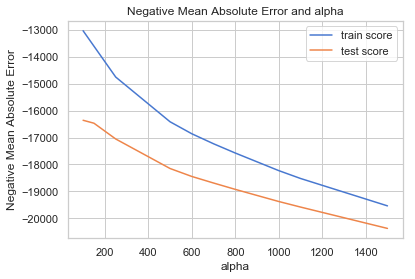

In [83]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show();

In [84]:
print('Lasso Grid Best Score - ',model_lasso_cv.best_score_)
print('Lasso Grid Best Params - ',model_lasso_cv.best_params_)

Lasso Grid Best Score -  -16359.441363290784
Lasso Grid Best Params -  {'alpha': 100}


#### **Observations**<br>
> - From the plot of alpha scores against negative mean error we can find the best optimum score is achived for alpha is `100`.
> - Let us redo the Lasso Regression using optimum alpha of 100 and calculate the scores.

### 9.2:  Lasso Regression with alpha = 100 for Train  (hyperparamter) 

In [85]:
# Set alpha parameter as 100.
alpha =100

# Generate Lasso Model for alpha 100.
lasso_100 = Lasso(alpha=alpha)     
lasso_100.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
# Verify the Co-efficients.
lasso_100.coef_

array([ 0.00000000e+00,  0.00000000e+00,  3.06189164e+03,  0.00000000e+00,
        0.00000000e+00,  3.29879769e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.73744304e+02,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.86058422e+01,
       -5.67760389e+03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.25029006e+03, -2.88167374e+03, -0.00000000e+00, -4.09219118e+02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.66411684e+02,  1.54403017e+04, -1.43321891e+04,
        1.45470959e+03, -4.31175149e+03, -0.00000000e+00, -7.29662062e+03,
       -6.37631511e+03,  0.00000000e+00, -2.25984951e+02,  2.81031696e+04,
        9.58561389e+03, -7.52493118e+03,  0.00000000e+00, -4.59261373e+03,
        1.12394334e+03,  

#### **Observations**<br>
> -  As with optimum alpha of `100` many insignificant features are removed as coefficients are set to 0
> -  Thus lasso provides the way to reduce insignificant and or remove the features which are highly collinear or way to insiginificant for the model. 

#### **Inference**<br>
> - Predict the target based on the feature selected on both train and test 
> - Find the score for train scores for ;
    - Adjusted R - square
    - Root mean square error
    - AIC & BIC

In [87]:
# Predict the y for the train data set
y_train_pred = lasso_100.predict(X_train)

In [89]:
# Calculate AIC and BIC and the Mean Square Error for train predictions.

AIC = aic.aic(y_train,y_train_pred,100)
BIC = bic.bic(y_train,y_train_pred,100)
RMSE = np.sqrt(mean_squared_error(y_train,y_train_pred))

#Print AIC,BIC and  Mean Square Root for train data.
print("Lasso AIC for Train Data : ", AIC)
print("Lasso BIC for Train Data : ", BIC)
print("Lasso RMSE for Train Data : ", RMSE)

#  R2 Score for Train
print("Lasso R2 Score for Train Data : ", lasso_100.score(X_train,y_train))

Lasso AIC for Train Data :  20417.92260549253
Lasso BIC for Train Data :  20910.776387308997
Lasso RMSE for Train Data :  19951.098307228105
Lasso R2 Score for Train Data :  0.9363070865380848


### 9.3:  Lasso Regression with alpha = 100 on test data  prediction

In [88]:
X_test[norm_cols] = scaler.fit_transform(X_test[norm_cols])

d:\program files\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
d:\program files\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [90]:
X_test.shape
X_test.describe()

(438, 311)

,Street,Utilities,CentralAir,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,BsmtHalfBath_0,BsmtHalfBath_1,FullBath_1,FullBath_2,FullBath_3,HalfBath_0,HalfBath_1,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_0,Fireplaces_1,Fireplaces_2,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NF,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,Gara

In [91]:
y_test_pred = lasso_100.predict(X_test)

In [92]:
# Calculate AIC and BIC and the Mean Square Error for test predictions.

AIC = aic.aic(y_test,y_test_pred,100)
BIC = bic.bic(y_test,y_test_pred,100)
RMSE = np.sqrt(mean_squared_error(y_test,y_test_pred))

#Print AIC,BIC and  Mean Square Root for train data.
print("Lasso AIC for Test Data : ", AIC)
print("Lasso BIC for Test Data : ", BIC)
print("Lasso RMSE for Test Data : ", RMSE)

# Adjusted R2 Score for Train
print("Lasso R2 Score for Test Data : ", lasso_100.score(X_test,y_test))

Lasso AIC for Test Data :  9196.54403754898
Lasso BIC for Test Data :  9604.765928586625
Lasso RMSE for Test Data :  28854.678931605093
Lasso R2 Score for Test Data :  0.8706233752363419


### 9.4:  Visualising the residual Errors for Lasso Regression Predictions

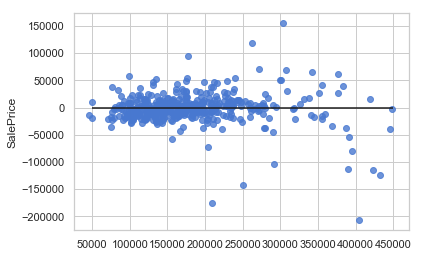

In [92]:
sns.regplot(x=y_test_pred, y=(y_test_pred - y_test),color='b',fit_reg=False)
plt.hlines(y=0, xmin= 50000, xmax=450000)
plt.show();

#### **Observations**<br>
> - Predict the target based on the feature selected on both train and test 
> - The lasso scores for train scores with optimum value of alpha = 100  ;
    - AIC  - `20417.92260549253`
    - BIC  - `20910.77638730899` 
    - RMSE - `19951.098307228105`
    - R2 Score - `0.936307086538084`
> - The lasso scores for test scores with optimum value of alpha = 100 ;  
    - AIC  - `9167.777050586832`
    - BIC  - `9575.998941624477`
    - RMSE - `28854.6789316051`
    - R2 Score - `0.8706233752363419`
> - The residual error plot is more or less homoskedastic and with few outliers.

### 9.5:  Top 15 features with high coefficient after optimized Lasso

In [93]:
lasso_features = pd.DataFrame(pd.Series(lasso_100.coef_,index=X.columns)).reset_index()
lasso_features.columns = ['Feature','Coefficient']

In [96]:
lasso_features

,Feature,Coefficient
0,Street,0.000000
1,Utilities,0.000000
2,CentralAir,3061.891643
3,MSZoning_FV,0.000000
4,MSZoning_RH,0.000000
5,MSZoning_RL,3298.797691
6,MSZoning_RM,-0.000000
7,MSSubClass_30,-0.000000
8,MSSubClass_40,0.000000
9,MSSubClass_45,0.000000


In [97]:
lasso_features.loc[(lasso_features.Coefficient == 0)].count()
len(lasso_features)
len(lasso_features) - lasso_features.loc[(lasso_features.Coefficient == 0)].count()

Feature        186
Coefficient    186
dtype: int64

311

Feature        125
Coefficient    125
dtype: int64

In [98]:
# List out the top 15 significant features
lasso_top15 = lasso_features.loc[(lasso_features.Coefficient != 0),:]\
                 .sort_values(by='Coefficient',ascending=False).head(15)
lasso_top15

,Feature,Coefficient
91,OverallQual_10,80874.997037
90,OverallQual_9,41741.519077
201,FullBath_3,40777.528121
111,RoofMatl_WdShngl,40373.840951
47,Neighborhood_NoRidge,28103.169564
302,2ndFlrSF,21258.659540
301,1stFlrSF,20144.827277
232,KitchenQual_Ex,18447.882932
89,OverallQual_8,17547.937418
156,BsmtQual_Ex,17211.323905


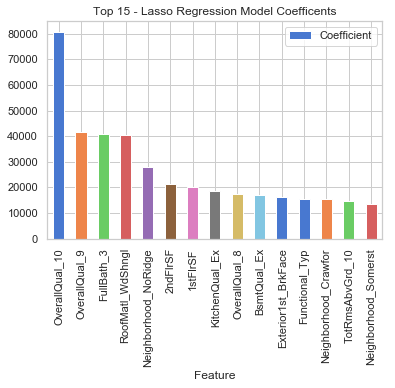

In [99]:
lasso_top15.plot(kind='bar',x='Feature',y='Coefficient',title='Top 15 - Lasso Regression Model Coefficents')
plt.show();

### 9.5:  Ridge Regression 

In [100]:
ridge = Ridge()

# cross validation
folds = 5
model_ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.2s finished
d:\program files\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [100, 150, 250, 500, 600, 700, 800, 900, 1000, 1100, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [101]:
cv_ridge_results = pd.DataFrame(model_ridge_cv.cv_results_)
cv_ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.110990,0.198371,0.001793,0.000764,100,{'alpha': 100},-15923.434647,-20225.971811,-18621.309085,-16872.078845,-16939.033430,-17714.609510,1526.632290,1,-16424.660118,-15357.302018,-15799.458605,-16276.399423,-16282.070180,-16027.978069,396.398822
1,0.009703,0.000575,0.001296,0.000392,150,{'alpha': 150},-15971.290583,-20953.161823,-18921.375802,-16965.665847,-17671.047845,-18094.426874,1721.907748,2,-17183.067550,-16028.069742,-16455.704318,-16950.293928,-16893.832249,-16702.193557,411.027698
2,0.010238,0.001113,0.001204,0.000396,250,{'alpha': 250},-16117.668284,-21934.824141,-19638.899841,-17224.940159,-18621.304879,-18704.990870,2010.413036,3,-18200.976488,-16972.474707,-17337.597645,-17933.283654,-17808.574800,-17650.581459,439.455288
3,0.010788,0.000754,0.001078,0.000129,500,{'alpha': 500},-16837.866827,-23496.454412,-20879.828929,-17826.912413,-19930.198119,-19791.356562,2346.474460,4,-19721.241946,-18351.986033,-18703.626733,-19427.344562,-19197.196185,-19080.279092,493.403528
4,0.009983,0.000041,0.001401,0.000489,600,{'alpha': 600},-17159.736087,-23962.642226,-21294.134559,-18031.512927,-20322.733750,-20151.219083,2421.564234,5,-20149.758721,-18767.093044,-19122.478486,-19892.619475,-19645.878632,-19515.565672,505.189207


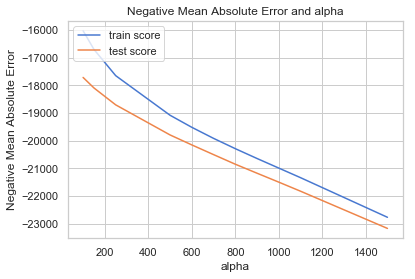

In [102]:
# plotting mean test and train scoes with alpha 
cv_ridge_results['param_alpha'] = cv_ridge_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_ridge_results['param_alpha'], cv_ridge_results['mean_train_score'])
plt.plot(cv_ridge_results['param_alpha'], cv_ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show();

In [103]:
print("Ridge Grid Best Score", model_ridge_cv.best_score_)
print("Ridge Grid Best Params : ", model_ridge_cv.best_params_)

Ridge Grid Best Score -17714.609509764054
Ridge Grid Best Params :  {'alpha': 100}


### **Observations**<br>
> - From the plot of alpha scores against negative mean error for Ridge Regresson we can find the best optimum score is achived for alpha is `30`.
> - Let us redo the Ridge Regression using optimum alpha of `30` and calculate the scores.

In [104]:
# Set the parameters to 30.
alpha = 30
ridge_30 = Ridge(alpha=alpha)

# Generate Ridge Model for alpha 30.
ridge_30.fit(X_train, y_train)

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [105]:
ridge_30.coef_

array([ 4.00086028e+02,  4.93736409e+02,  5.12648558e+03,  4.47083490e+03,
        9.67273629e+02,  2.43197588e+03, -1.17331439e+03, -2.05891353e+03,
       -1.85837305e+01,  1.92104332e+03, -6.98316647e+02,  1.05426962e+03,
        1.79786777e+03, -1.37202361e+03, -9.92456639e+02, -1.25236352e+03,
       -1.68815341e+03, -1.16130533e+03, -2.30584838e+02,  8.43311430e+01,
       -2.83257627e+03,  1.78020225e+03,  8.93840929e+02,  1.32026391e+03,
       -7.48576944e+03,  2.32220617e+03,  3.14210286e+03, -8.47225503e+02,
        5.13933906e+03, -3.03176525e+03, -1.58342003e+03, -2.12153950e+03,
        1.98054384e+03, -4.04235804e+03,  5.22268821e+02,  1.00941598e+03,
        8.26037447e+02, -3.71458907e+03,  8.83122921e+03, -1.33742437e+04,
        4.91931916e+01, -3.18980042e+03, -2.02339006e+03, -7.27031296e+03,
       -6.27954089e+03,  2.09473415e+03, -1.81054789e+03,  1.50385518e+04,
        8.48897858e+03, -5.07933778e+03, -1.17575006e+02, -5.06819717e+03,
        3.32726210e+02,  

In [106]:
# Predict the y for the train data set for Ridge regression with alpha 100.
y_ridge_train_pred = ridge_30.predict(X_train)

In [107]:
# Calculate AIC and BIC and the Mean Square Error for train predictions.

AIC = aic.aic(y_train,y_ridge_train_pred,30)
BIC = bic.bic(y_train,y_ridge_train_pred,30)
#RMSE = np.sqrt(np.mean((y_ridge_train_pred - y_train)**2))
RMSE = np.sqrt(mean_squared_error(y_train,y_ridge_train_pred))

#Print AIC,BIC and  Mean Square Root for train data.
print("Ridge AIC for Train Data : ", AIC)
print("Ridge BIC for Train Data : ", BIC)
print("Ridge RMSE for Train Data : ", RMSE)

# Adjusted R2 Score for Train
print("Ridge R2 Score for Train Data : ", ridge_30.score(X_train,y_train))

Ridge AIC for Train Data :  20677.768950509937
Ridge BIC for Train Data :  20825.62508505488
Ridge RMSE for Train Data :  24266.464450415675
Ridge R2 Score for Train Data :  0.9057740534300176


### 9.6:  Ridge Regression with alpha = 30 on test data  prediction

In [108]:
y_ridge_test_pred = ridge_30.predict(X_test)

In [109]:
# Calculate AIC and BIC and the Mean Square Error for test predictions.

AIC = aic.aic(y_test,y_ridge_test_pred,30)
BIC = bic.bic(y_test,y_ridge_test_pred,30)
RMSE = np.sqrt(mean_squared_error(y_test,y_ridge_test_pred))

#Print AIC,BIC and  Mean Square Root for train data.
print("Ridge AIC for Test Data : ", AIC)
print("Ridge BIC for Test Data : ", BIC)
print("Ridge RMSE for Test Data : ", RMSE)


#  R2 Score for Train
print("Ridge R2 Score for Test Data : ", ridge_30.score(X_test,y_test))

Ridge AIC for Test Data :  9068.493239438258
Ridge BIC for Test Data :  9190.959806749552
Ridge RMSE for Test Data :  29250.971961196195
Ridge R2 Score for Test Data :  0.8670452286495014


### 9.7:  Visualising the residual Errors for Ridge Regression predictions

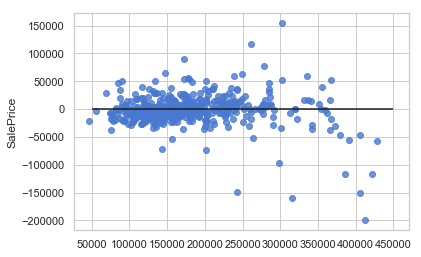

In [110]:
sns.regplot(x=y_ridge_test_pred, y=(y_ridge_test_pred - y_test),color='b',fit_reg=False)
plt.hlines(y=0, xmin= 50000, xmax=450000)
plt.show();

#### **Observations**<br>
> - Predict the target based on the ridge regression features selected on both train and test 
> - The Ridges scores for train data with optimum value of alpha = 30  ;
  - AIC  - `20677.76895050994`
  - BIC  - `20825.62508505488`
  - RMSE - `24266.464450415675`
  - R2 Score - `0.9057740534300176`
> - The Ridge scores for test date prediction with optimum value of alpha = 30 ;  
  - AIC  - `9068.493239438258`
  - BIC  - `9190.959806749552`
  - RMSE - `29250.971961196195`
  - R2 Score - `0.8670452286495014`

> - The residual error plot is more or less homoskedastic and with few outliers.

### 9.7:  Top 15 features with high coefficient after optimized Ridge for alpha 30

In [111]:
ridge_features = pd.DataFrame(pd.Series(ridge_30.coef_,index=X.columns)).reset_index()
ridge_features.columns = ['Feature','Coefficient']

# List out the top 10 significant features
ridge_top15 = ridge_features.loc[(ridge_features.Coefficient != 0),:]\
                        .sort_values(by='Coefficient',ascending=False).head(15)
ridge_top15

,Feature,Coefficient
201,FullBath_3,17041.110742
221,TotRmsAbvGrd_10,15039.957406
47,Neighborhood_NoRidge,15038.551834
91,OverallQual_10,14298.957090
156,BsmtQual_Ex,13122.243667
232,KitchenQual_Ex,13044.012431
301,1stFlrSF,12312.827308
302,2ndFlrSF,11924.884120
240,Functional_Typ,11442.877192
90,OverallQual_9,11400.904560


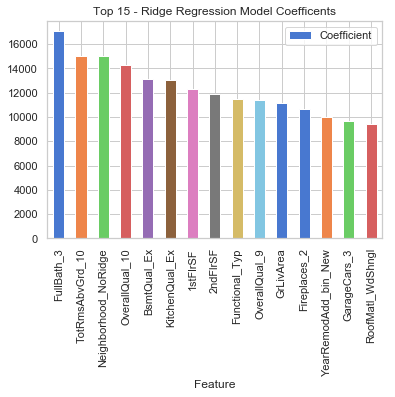

In [112]:
ridge_top15.plot(kind='bar',x='Feature',y='Coefficient',title='Top 15 - Ridge Regression Model Coefficents')
plt.show();

#### **Inference**<br>
> - The R-Square Scores for predicted Test data sets more or less similar lines for Lasso `0.870` and Ridge `0.867` respectvely.
> - The RMSE scores for predicted Test data for Lasso `28854.67` and Ridge `29250.97` respectively.
> - Using Lasso However, we have managed to reduce to number of features from `311` to `125`  - as much `186` insiginificant features are removed from the model.